# Analysis of the outflow of customers of the bank "Metanprom"

**Project content**

1. [Familiarization with data](#start)
2. [Data preprocessing](#preprocessing)
3. [Exploratory Data Analysis](#eda)
4. [Hypothesis testing](#hypot)
5. [Creating customer retention portraits (segmentation)](#portr)
6. [General conclusions](#conclusion)
7. [Recommendations](#recomend)
8. [Presentation](#present)
9. [Dashboards](#dash)

**Description of the project**

The regional bank "Metanprom" is experiencing an outflow of customers. The bank's marketing department commissioned a study.

The purpose of the study: To identify the most vulnerable customer segments that leave more often than others, and provide recommendations for retaining customers in the future.

Research objectives:

1. Determine how revenue affects customer retention.
2. Understand how age and gender affect customer retention.
3. Determine how the number of products received at the bank affects customer retention.
4. Consider the relationship between retention and customer activity.
5. Consider the geography of loyal customers.
5. Analyze the categories of active clients.
6. Give portraits of loyal and potentially disloyal customers.
7. Make a dashboard and presentation.

## Familiarization with data
<a id="start"></a>

*Let's call the libraries we need*

In [1]:
!pip install phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
import math as mt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.pyplot import figure
import plotly.express as px
from plotly import graph_objects as go

import phik
from phik.report import plot_correlation_matrix
from phik import report

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower
import pylab


*Let's output dataframe* 

In [2]:
try:
     data = pd.read_csv('https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F')
except:
     data = pd.read_csv('https://drive.google.com/file/d/1oB6mGQ1HNgLZeUinFckPDZvESlezkvmq/view?usp=sharing')

In [3]:
data.head(20)

USERID  score       city gender  age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3   225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4   157978  730.0  Ярославль      М   34       5      174.00         1   
5   202305  856.0    Рыбинск      М   56       4   863687.24         3   
6   177259  807.0  Ярославль      Ж   39       3   405042.44         3   
7   218868  825.0  Ярославль      Ж   38       4   458145.40         2   
8   211686  923.0  Ярославль      М   54       5  1206337.87         2   
9   133130  906.0  Ярославль      Ж   67       0         NaN         1   
10  148929  927.0     Ростов      М   52       0         NaN         1   
11  172184  921.0     Ростов      М   41       0         NaN         1   
12  132970  845.0  Ярославль      Ж   31       3   591928.52         2   
13  166357  837.0    Рыбинск      Ж   28       4   302249.22         2   
14  172138  815.0  Ярославль      М   35       5   547499.87         2   
15  120260  731.0    Рыбинск      М   42       3  1480548.47         3   
16  123335  829.0  Ярославль      М   45       5   507842.84         1   
17  214277  793.0  Ярославль      М   53       3   627034.50         2   
18  136651  876.0  Ярославль      М   40       5  2307947.36         2   
19  127034  922.0    Рыбинск      Ж   53       0         NaN         1   

    credit_card  last_activity  EST_SALARY  churn  
0             0              1    75719.14      1  
1             1              0    86621.77      0  
2             1              1   107683.34      0  
3             0              1   174423.53      1  
4             1              0    67353.16      1  
5             1              0   156619.80      0  
6             0              1   103838.32      0  
7             1              1    68085.48      0  
8             1              0   155371.79      0  
9             0              1   238055.53      0  
10            1              1   196820.07      0  
11            1              1   217469.48      0  
12            1              1   112697.16      1  
13            0              1    30950.94      0  
14            1              1   105883.26      0  
15            1              0   160974.43      0  
16            1              1   169330.64      0  
17            1              0   183430.19      0  
18            0              0   287010.61      0  
19            0              0   147094.82      0

**Dataframe content**
- `userid ` - user ID
- `score ` - credit scoring 
- `city` - city
- `gender` - gender
- `age` — age
- `equity` - approximate value of the client's property
- `balance` — account balance
- `products ` - the number of products used by the client
- `credit_card` - whether there is a credit card
- `last_activity ` - whether the client was active recently
- `salary ` - client's salary
- `churn` - leaves or not

*Let's call the "describe" and "info" methods to continue our acquaintance with the data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [5]:
data.describe()

USERID         score           age        equity       balance  \
count   10000.00000  10000.000000  10000.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400     42.837100      2.627600  8.277943e+05   
std     33708.23812     65.448519     12.128507      1.980836  1.980614e+06   
min     94561.00000    642.000000     18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000     34.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000     40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000     51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000     86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.874100      0.680400       0.523500  1.478669e+05      0.182200  
std        0.799946      0.466345       0.499472  1.393885e+05      0.386029  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

*Выведим общие гистограммы данных, чтобы ознакомиться с ними.*

In [6]:
sns.set_style('dark')

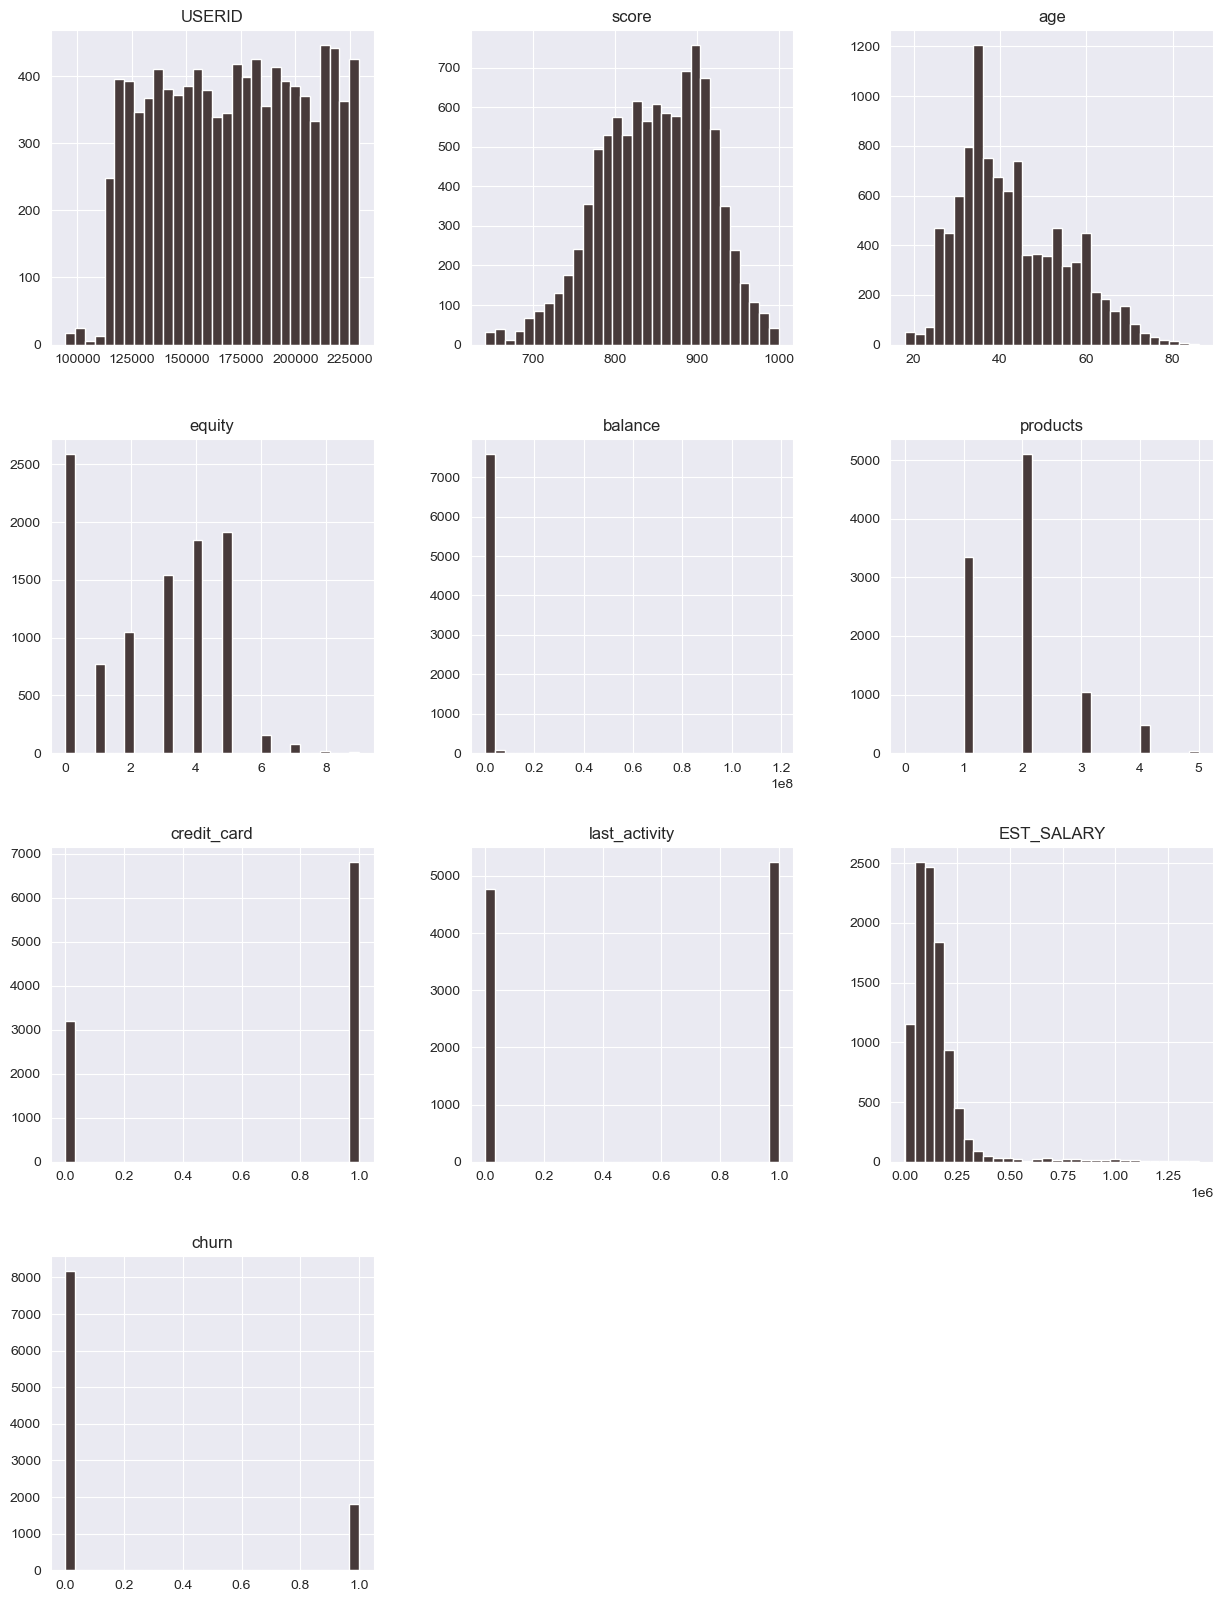

In [7]:
data.hist(bins=30,figsize=(15, 20), color = '#473a3a');

*Рассмотрим подробнее столбец с балансом счета и зарплатой, ограничив выбросы*

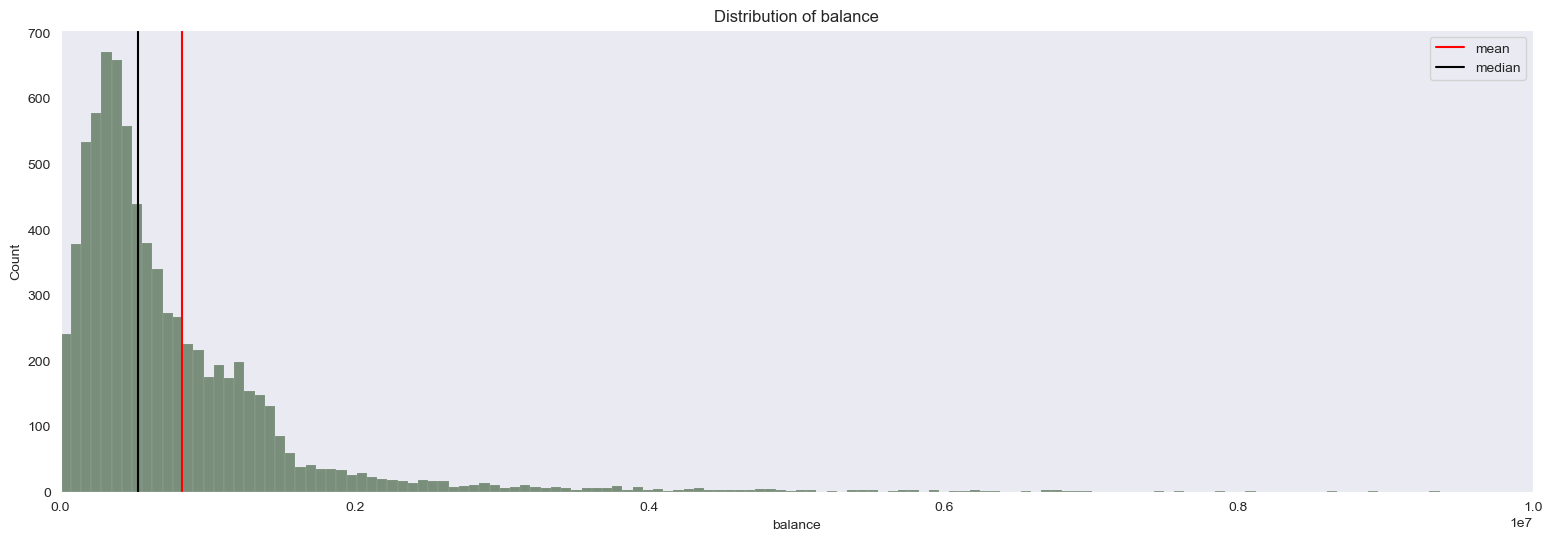

In [8]:
plt.figure(figsize=(19,6))
sns.histplot(data['balance'], color = '#557153')
plt.axvline(data['balance'].mean(), color = 'red', label = 'mean')
plt.axvline(data['balance'].median(), color = 'black', label = 'median')
plt.title('Distribution of balance')
plt.xlim(0,1.0e+07)
plt.legend()
plt.show()

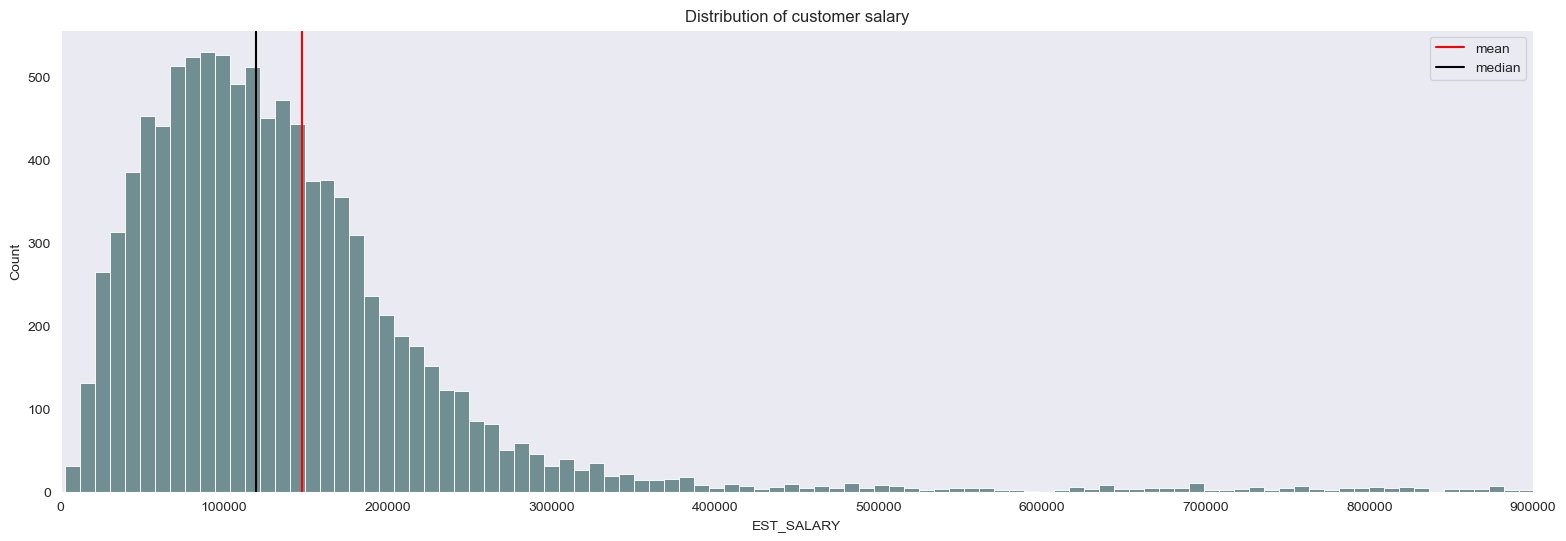

In [9]:
plt.figure(figsize=(19,6))
sns.histplot(data['EST_SALARY'], color = '#497174')
plt.axvline(data['EST_SALARY'].mean(), color = 'red', label = 'mean')
plt.axvline(data['EST_SALARY'].median(), color = 'black', label = 'median')
plt.title('Distribution of customer salary')
plt.xlim(0,0.9e+06)
plt.legend()
plt.show()

*As we can see, only the distribution of the credit rating tends to the normal distribution, the rest of the distributions are strongly shifted to the left, and there are a sufficient number of outliers and anomalies*

<div style="border:solid green 2px; padding: 20px">

    
**Conclusions:**
The data contains 10000 rows. The data gaps are found in one 'balance' column, they need to be processed. Column names must be converted to lowercase. It is also necessary to check the data for duplicates, change data types, and get rid of anomalies. The categorical variables also need to be recoded. Getting Started with Data Preprocessing

## Data Preprocessing
<a id="preprocessing"></a>

### Duplicate Handling

*We start by checking for explicit and implicit duplicates, first, we find their number*

In [10]:
data.duplicated().mean()

0.0001

In [11]:
data[data.duplicated()== True]

USERID  score       city gender  age  equity  balance  products  \
9457  141945  929.0  Ярославль      М   33       0      NaN         1   

      credit_card  last_activity  EST_SALARY  churn  
9457            1              0   381868.89      0

*since one row is duplicated, then delete it*

In [12]:
data = data.drop_duplicates().reset_index(drop=True) 

In [13]:
data.duplicated().mean()

0.0

In [14]:

data.duplicated(subset='USERID').sum()

72

*Let's check for implicit duplicates, and display all cities and genders, since this is the only lowercase value in the columns*

In [15]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [16]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

*We have three different cities and two genders. Thus there can be no implicit duplicates*

### Let's fix column names

*We bring the columns to the low register*

In [17]:
data.columns = data.columns.str.lower()

In [18]:
data.head(1)

userid  score     city gender  age  equity   balance  products  \
0  183012  850.0  Рыбинск      Ж   25       1  59214.82         2   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1

### Exploring Data Types

*Once again, we will derive data types*

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.5+ KB


*The only column whose data type can be changed is the credit score since it is an integer.*

In [20]:
data['score'] = data['score'].astype('int')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   int32  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 898.5+ KB


### Gaps processing

*Let's display the gaps again, now as a percentage*

In [22]:
data.isna().mean()

userid           0.000000
score            0.000000
city             0.000000
gender           0.000000
age              0.000000
equity           0.000000
balance          0.229423
products         0.000000
credit_card      0.000000
last_activity    0.000000
est_salary       0.000000
churn            0.000000
dtype: float64

*There are 23% gaps in the account balance column, which is a lot. Let's try to classify them before we do anything with them:*

In [23]:
data[(data['balance'].isna()== True)& (data['churn']==1)].head(20)

userid  score       city gender  age  equity  balance  products  \
1273  136567    961  Ярославль      М   31       0      NaN         1   
1400  146876    707  Ярославль      М   24       0      NaN         3   
3017  123230    980    Рыбинск      Ж   53       0      NaN         1   
4118  157443    727     Ростов      М   33       0      NaN         1   
4302  167482    955  Ярославль      М   62       0      NaN         1   
5578  136508    739    Рыбинск      М   49       0      NaN         2   
6827  205707    953  Ярославль      М   30       0      NaN         3   
7572  144559    748  Ярославль      М   45       0      NaN         1   
8185  116284    743  Ярославль      М   48       0      NaN         1   
8611  195981    763  Ярославль      Ж   48       0      NaN         1   
8957  147837    962    Рыбинск      Ж   79       3      NaN         0   
9181  228103    946    Рыбинск      М   37       0      NaN         3   
9227  116750    776  Ярославль      М   46       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1273            1              0  1015386.14      1  
1400            1              0    94091.11      1  
3017            1              1   327646.02      1  
4118            1              0   132546.93      1  
4302            1              0   157784.96      1  
5578            1              1   280945.17      1  
6827            1              0   157069.20      1  
7572            1              0   288756.23      1  
8185            1              1   634457.21      1  
8611            1              0   248232.39      1  
8957            0              0    25063.96      1  
9181            0              0   196941.60      1  
9227            1              0   540423.84      1

In [24]:
data[(data['balance'].isna()== True)& (data['churn']==1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1273 to 9227
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         13 non-null     int64  
 1   score          13 non-null     int32  
 2   city           13 non-null     object 
 3   gender         13 non-null     object 
 4   age            13 non-null     int64  
 5   equity         13 non-null     int64  
 6   balance        0 non-null      float64
 7   products       13 non-null     int64  
 8   credit_card    13 non-null     int64  
 9   last_activity  13 non-null     int64  
 10  est_salary     13 non-null     float64
 11  churn          13 non-null     int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 1.3+ KB


In [25]:
data[(data['balance'].isna()== True)& (data['churn']==0)]

userid  score       city gender  age  equity  balance  products  \
2     120722    892    Рыбинск      Ж   30       0      NaN         1   
9     133130    906  Ярославль      Ж   67       0      NaN         1   
10    148929    927     Ростов      М   52       0      NaN         1   
11    172184    921     Ростов      М   41       0      NaN         1   
19    127034    922    Рыбинск      Ж   53       0      NaN         1   
...      ...    ...        ...    ...  ...     ...      ...       ...   
9975  208085    876     Ростов      М   38       0      NaN         1   
9983  125941    729  Ярославль      Ж   42       0      NaN         1   
9992  219924    884    Рыбинск      Ж   36       0      NaN         1   
9995  139170    894  Ярославль      М   46       0      NaN         1   
9996  115639    903  Ярославль      М   24       0      NaN         2   

      credit_card  last_activity  est_salary  churn  
2               1              1   107683.34      0  
9               0              1   238055.53      0  
10              1              1   196820.07      0  
11              1              1   217469.48      0  
19              0              0   147094.82      0  
...           ...            ...         ...    ...  
9975            0              0   171763.69      0  
9983            1              1   687538.70      0  
9992            1              1   169844.88      0  
9995            1              0   196898.29      0  
9996            1              1   108905.09      0  

[2281 rows x 12 columns]

In [26]:
data[(data['balance'].isna()== True)& (data['churn']==0)&(data['equity']!=0)].head(20)

userid  score       city gender  age  equity  balance  products  \
46    118927    921  Ярославль      Ж   72       1      NaN         1   
66    224917    737  Ярославль      Ж   54       1      NaN         1   
68    216960    933  Ярославль      М   49       1      NaN         1   
109   190714    894  Ярославль      Ж   48       1      NaN         1   
187   160545    726     Ростов      Ж   61       1      NaN         1   
200   219269    966  Ярославль      М   40       1      NaN         1   
417   226216    917  Ярославль      М   33       1      NaN         2   
594   136193    949  Ярославль      М   32       1      NaN         2   
630   198833    897    Рыбинск      М   28       1      NaN         1   
700   149479    947  Ярославль      Ж   33       1      NaN         1   
807   123823    916  Ярославль      Ж   42       1      NaN         1   
808   139273    709  Ярославль      М   25       1      NaN         1   
843   188262    904  Ярославль      Ж   67       1      NaN         1   
883   186882    910    Рыбинск      М   40       1      NaN         1   
924   141015    711  Ярославль      М   33       1      NaN         1   
1068  201177    728    Рыбинск      М   29       1      NaN         1   
1175  157731    907  Ярославль      Ж   72       1      NaN         1   
1187  117845    938  Ярославль      М   42       1      NaN         1   
1226  193714    902  Ярославль      Ж   39       1      NaN         1   
1229  144676    911  Ярославль      М   40       1      NaN         1   

      credit_card  last_activity  est_salary  churn  
46              1              0   253494.70      0  
66              1              0   113173.05      0  
68              1              1   130281.88      0  
109             1              1   231073.35      0  
187             1              0   231704.73      0  
200             1              1   288972.03      0  
417             1              0   243132.81      0  
594             1              1   561705.64      0  
630             0              1   149818.43      0  
700             1              0   281312.24      0  
807             1              1   312882.58      0  
808             1              0    73651.06      0  
843             0              1    93991.40      0  
883             0              1   643395.53      0  
924             1              0   175959.83      0  
1068            1              1   638521.29      0  
1175            0              0   774218.47      0  
1187            1              0   281361.88      0  
1226            1              1    27176.75      0  
1229            0              1   252391.36      0

In [27]:
data.groupby(data.balance.isna()).mean()\
    .T.apply(lambda row: pd.Series((row[0],row[1],(row[0]/row[1])-1),index=["There is balance","There is no balance","Difference"]),axis=1)\
    .sort_values("Difference",ascending=False).style.format("{:_.2f}")

*As we can see, 99% of the misses are associated with a property rating of 0, as well as with the leakage of users, so we can talk about some kind of connection with the data, according to the classification, this is MNAR (Missing Not At Random / Absent not by chance) - the misses depend on the data, without additional justification, they cannot be discarded or filled with one value, because this will lead to noticeable distortion.*

*We can't get rid of them because it will lead to significant data loss. It is shown above that the distribution of this column is highly biased, so it is necessary to fill in with the median, and filling in with the average will lead to data distortion; check the minimum values ​​of this column to understand if the zero balance is hidden behind gaps*

In [28]:
data[data['balance']== 0]

userid  score       city gender  age  equity  balance  products  \
3900  179831    730  Ярославль      М   18       0      0.0         2   
6757  148456    813  Ярославль      М   20       2      0.0         2   

      credit_card  last_activity  est_salary  churn  
3900            1              1    64548.33      0  
6757            1              0    23876.51      0

*As you can see, zero values are also present, which means that filling in with 0 will also lead to distortions, and this is not the reason for the gaps, since calculations with this column will not be performed, and it is also not supposed to filter data by this column, let's leave the gaps unchanged.*

### Anomaly handling

*Let's call the .describe() method again to review the data*

In [29]:
data.describe()

userid        score          age       equity       balance  \
count    9999.000000  9999.000000  9999.000000  9999.000000  7.705000e+03   
mean   171817.699870   848.691369    42.838084     2.627863  8.277943e+05   
std     33708.600055    65.446864    12.128714     1.980761  1.980614e+06   
min     94561.000000   642.000000    18.000000     0.000000  0.000000e+00   
25%    142815.500000   802.000000    34.000000     0.000000  2.955542e+05   
50%    172740.000000   853.000000    40.000000     3.000000  5.242722e+05   
75%    201262.500000   900.000000    51.000000     4.000000  9.807058e+05   
max    229145.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  9999.000000  9999.000000    9999.000000  9.999000e+03  9999.000000  
mean      1.874187     0.680368       0.523552  1.478435e+05     0.182218  
std       0.799938     0.466357       0.499470  1.393758e+05     0.386044  
min       0.000000     0.000000       0.000000  2.546300e+03     0.000000  
25%       1.000000     0.000000       0.000000  7.525178e+04     0.000000  
50%       2.000000     1.000000       1.000000  1.196547e+05     0.000000  
75%       2.000000     1.000000       1.000000  1.744997e+05     0.000000  
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000

*According to the conditions, each client of our bank must have at least one product*

In [30]:
data[data['products']== 0]

userid  score     city gender  age  equity  balance  products  \
8957  147837    962  Рыбинск      Ж   79       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

In [31]:
data['churn'].value_counts()

0    8177
1    1822
Name: churn, dtype: int64

*Since this is the only line and there are other 0 indicators, we consider it an anomaly and remove it from the dataset* 

In [32]:
data = data[data['products']!= 0].copy()

In [33]:
data.describe()

userid        score          age       equity       balance  \
count    9998.000000  9998.000000  9998.000000  9998.000000  7.705000e+03   
mean   171820.098420   848.680036    42.834467     2.627826  8.277943e+05   
std     33709.432631    65.440325    12.123927     1.980856  1.980614e+06   
min     94561.000000   642.000000    18.000000     0.000000  0.000000e+00   
25%    142813.250000   802.000000    34.000000     0.000000  2.955542e+05   
50%    172743.500000   853.000000    40.000000     3.000000  5.242722e+05   
75%    201263.250000   900.000000    51.000000     4.000000  9.807058e+05   
max    229145.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  9998.000000  9998.000000    9998.000000  9.998000e+03  9998.000000  
mean      1.874375     0.680436       0.523605  1.478558e+05     0.182136  
std       0.799758     0.466331       0.499467  1.393774e+05     0.385976  
min       1.000000     0.000000       0.000000  2.546300e+03     0.000000  
25%       1.000000     0.000000       0.000000  7.525207e+04     0.000000  
50%       2.000000     1.000000       1.000000  1.196581e+05     0.000000  
75%       2.000000     1.000000       1.000000  1.744998e+05     0.000000  
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000

*now consider the lowest and highest salaries*

In [34]:
data.sort_values(by='est_salary'). head(10)

userid  score       city gender  age  equity     balance  products  \
8783  114221    948  Ярославль      Ж   26       1    77092.89         1   
2186  201407    938    Рыбинск      Ж   69       1   325483.52         3   
1753  161271    836  Ярославль      Ж   19       4     7703.05         4   
4860  193417    823     Ростов      Ж   64       2   277249.69         2   
1700  155567    747     Ростов      М   25       0     5750.92         1   
3689  219561    817     Ростов      М   25       3   121065.39         4   
3606  187819    839    Рыбинск      Ж   56       5  1027438.02         2   
2174  143340    830  Ярославль      Ж   72       2   294375.63         3   
9124  148483    811  Ярославль      Ж   75       5   542971.64         3   
9365  171110    788    Рыбинск      Ж   76       2   223228.01         2   

      credit_card  last_activity  est_salary  churn  
8783            1              0     2546.30      0  
2186            0              1     3487.33      0  
1753            1              1     5043.14      0  
4860            0              0     5341.50      0  
1700            1              0     7054.82      0  
3689            1              1     7522.14      0  
3606            0              0     7571.80      0  
2174            1              1     8032.18      0  
9124            1              1     8226.26      0  
9365            0              0     8260.33      0

In [35]:
data.sort_values(by='est_salary', ascending = False). head(10)

userid  score       city gender  age  equity      balance  products  \
4005  163640    912  Ярославль      М   35       4  15624095.80         2   
4637  149430    961  Ярославль      М   37       5   4054667.81         3   
4473  216422    956  Ярославль      М   27       0          NaN         1   
1600  197637    785  Ярославль      М   41       0          NaN         1   
5160  174746    731  Ярославль      Ж   30       0          NaN         2   
149   218801    958  Ярославль      М   34       0          NaN         1   
8147  135243    951  Ярославль      М   38       5  14134432.03         2   
9103  123965    939  Ярославль      М   34       5   9346657.08         1   
9710  193979    754  Ярославль      Ж   53       0          NaN         1   
1468  162749    940  Ярославль      М   32       2   4508306.65         2   

      credit_card  last_activity  est_salary  churn  
4005            0              1  1395064.45      0  
4637            0              0  1363549.52      0  
4473            1              0  1333687.36      0  
1600            1              0  1307090.18      0  
5160            1              0  1296838.08      0  
149             1              0  1292825.74      0  
8147            1              0  1281547.73      0  
9103            1              1  1263028.49      1  
9710            1              0  1261408.41      0  
1468            1              0  1260919.56      0

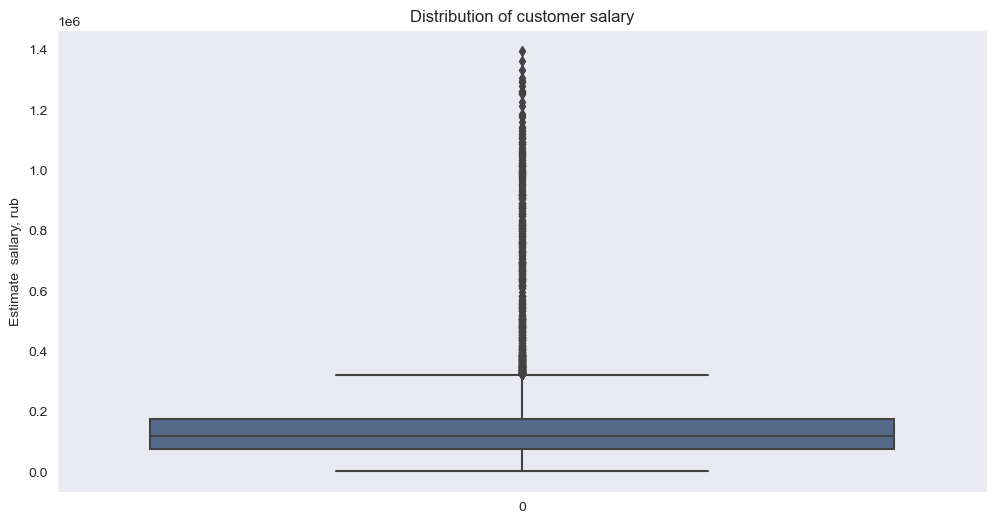

In [36]:
plt.figure(figsize=(12,6))
fig = sns.boxplot(data = data['est_salary'], color = '#4C6793' )
plt.title('Distribution of customer salary')
fig.set_ylabel('Estimate  sallary, rub',fontsize = 10)
plt.show()

*As we can see, there are a lot of emissions and they are quite homogeneous, there are very rich people from above, from below, of course, we can bring wages to the subsistence level in Russia, which is 12,654, let's see how many lines we lose*

In [37]:
data[data['est_salary']<12654].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 443 to 9365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         35 non-null     int64  
 1   score          35 non-null     int32  
 2   city           35 non-null     object 
 3   gender         35 non-null     object 
 4   age            35 non-null     int64  
 5   equity         35 non-null     int64  
 6   balance        35 non-null     float64
 7   products       35 non-null     int64  
 8   credit_card    35 non-null     int64  
 9   last_activity  35 non-null     int64  
 10  est_salary     35 non-null     float64
 11  churn          35 non-null     int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 3.4+ KB


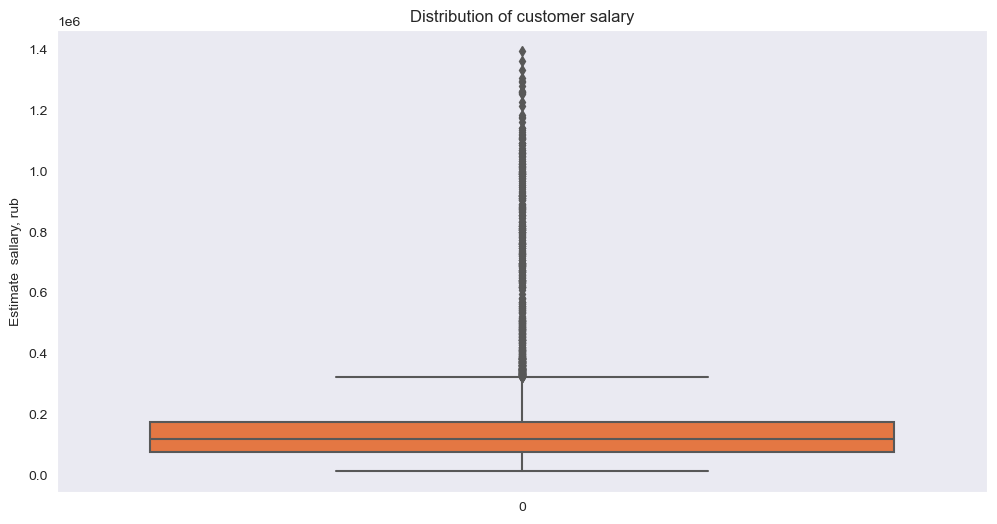

In [38]:
plt.figure(figsize=(12,6))
fig = sns.boxplot(data = data[data['est_salary']>12654]['est_salary'], color = '#FF6D28' )
plt.title('Distribution of customer salary')
fig.set_ylabel('Estimate  sallary, rub',fontsize = 10)
plt.show()

*As we can see, deleting these 35 rows will not affect the normal distribution of the column, so let's leave them* 

*Let's consider the maximum age of clients*

In [39]:
data.sort_values(by='age', ascending = False). head(20)

userid  score       city gender  age  equity     balance  products  \
9176  116838    777  Ярославль      Ж   86       3   772929.83         1   
9413  135210    921  Ярославль      Ж   86       0         NaN         1   
9423  159150    872    Рыбинск      Ж   84       3   418462.51         1   
3272  207759    888  Ярославль      Ж   84       3  1287558.90         3   
9442  196479    872     Ростов      Ж   83       4   546313.32         1   
2795  214518    820  Ярославль      Ж   83       3  1137456.03         3   
1621  151166    916    Рыбинск      Ж   83       0         NaN         1   
1987  219132    827    Рыбинск      Ж   82       3   275391.31         3   
8237  208065    785    Рыбинск      Ж   82       2  1221645.78         3   
9755  172175    839    Рыбинск      Ж   81       2   386253.06         2   
5602  151854    707  Ярославль      Ж   81       0         NaN         1   
4387  117913    658    Рыбинск      Ж   81       0         NaN         1   
1017  116085    832  Ярославль      Ж   81       1   363743.96         2   
5673  147965    854  Ярославль      Ж   81       3   803337.98         2   
396   205650    869     Ростов      Ж   80       4   570064.04         2   
9302  168360    960    Рыбинск      Ж   80       0         NaN         1   
1283  127231    796    Рыбинск      Ж   80       1   347590.32         2   
219   161758    754  Ярославль      Ж   80       1   332616.82         3   
4703  219171    851     Ростов      Ж   80       3   411612.85         1   
4808  123464    846  Ярославль      Ж   80       1   182518.55         2   

      credit_card  last_activity  est_salary  churn  
9176            1              1    40877.18      0  
9413            0              1    36185.91      0  
9423            1              1    34945.79      0  
3272            0              1    97982.17      0  
9442            1              1    91801.67      0  
2795            0              0    18037.97      0  
1621            1              1    55681.82      0  
1987            0              0    59205.90      0  
8237            1              1    66059.88      0  
9755            0              1    46585.96      0  
5602            1              0   102360.77      0  
4387            1              1   105088.10      0  
1017            0              0    36681.22      0  
5673            0              1    50386.82      0  
396             0              0    25503.20      0  
9302            0              1   548776.90      0  
1283            1              0    27123.50      0  
219             0              1   114804.27      0  
4703            1              1    22280.91      0  
4808            0              0    80769.31      0

*There are a lot of older clients, and it makes no sense to get rid of them*

### Coding of categorical variables

*In order to further consider all possible correlations, we encode the genders and cities presented in the dataset by adding the corresponding columns*

*By gender, we will do the following: M - 0; F -1* 

In [40]:
data['gender_code'] = data['gender'] 

In [41]:
data.head()

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn gender_code  
0            0              1    75719.14      1           Ж  
1            1              0    86621.77      0           Ж  
2            1              1   107683.34      0           Ж  
3            0              1   174423.53      1           Ж  
4            1              0    67353.16      1           М

In [42]:
replace_values = {'М':0, 'Ж': 1}
data = data.replace({'gender_code': replace_values})

In [43]:
data.head()

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  
0            0              1    75719.14      1            1  
1            1              0    86621.77      0            1  
2            1              1   107683.34      0            1  
3            0              1   174423.53      1            1  
4            1              0    67353.16      1            0

*Теперь закодируем Города*

In [44]:
data['yaroslavl'] = (data['city'] == 'Ярославль').astype('int')

In [45]:
data['ribinsk'] = (data['city'] == 'Рыбинск').astype('int')

In [46]:
data['rostov'] = (data['city'] == 'Ростов').astype('int')

In [47]:
data.head(5)

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  yaroslavl  \
0            0              1    75719.14      1            1          0   
1            1              0    86621.77      0            1          0   
2            1              1   107683.34      0            1          0   
3            0              1   174423.53      1            1          1   
4            1              0    67353.16      1            0          1   

   ribinsk  rostov  
0        1       0  
1        1       0  
2        1       0  
3        0       0  
4        0       0

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9998 non-null   int64  
 1   score          9998 non-null   int32  
 2   city           9998 non-null   object 
 3   gender         9998 non-null   object 
 4   age            9998 non-null   int64  
 5   equity         9998 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9998 non-null   int64  
 8   credit_card    9998 non-null   int64  
 9   last_activity  9998 non-null   int64  
 10  est_salary     9998 non-null   float64
 11  churn          9998 non-null   int64  
 12  gender_code    9998 non-null   int64  
 13  yaroslavl      9998 non-null   int32  
 14  ribinsk        9998 non-null   int32  
 15  rostov         9998 non-null   int32  
dtypes: float64(2), int32(4), int64(8), object(2)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   <br/> When pre-preparing the data, the following was done:
     <br/>Duplicates checked and removed.
     <br/>Data types have been changed.
     <br/>The passes have been checked.
     <br/>The data is free from outliers and anomalies to a degree that does not affect the sample.
     <br/>Required columns added.
     <br/>In total, we got rid of 2 rows of data.
     <br/>DataFrame prepared for further research and analysis

## Exploratory data analysis
<a id="eda"></a>

### Let's consider the share of leaking clients in the dataframe

In [49]:
data['churn'].value_counts()

0    8177
1    1821
Name: churn, dtype: int64

In [50]:
print("The part of churn costumers is {} % ".format( round(data['churn'].mean(), 2)*100))

The part of churn costumers is 18.0 % 


*Thus, at the time of the study, the total share of churning customers is 18%*

### Let's consider the difference between continuous customer characteristics

*we will derive column lists for loops, dividing them into categorical and continuous variables*

In [51]:
categorial = ['userid','gender', 'city',  'equity','products', 'credit_card', 'last_activity', 'churn']
numeric = ['userid', 'score', 'age', 'balance', 'est_salary']

*Let's build histograms for continuous variables with a division into retained and leaked customers*

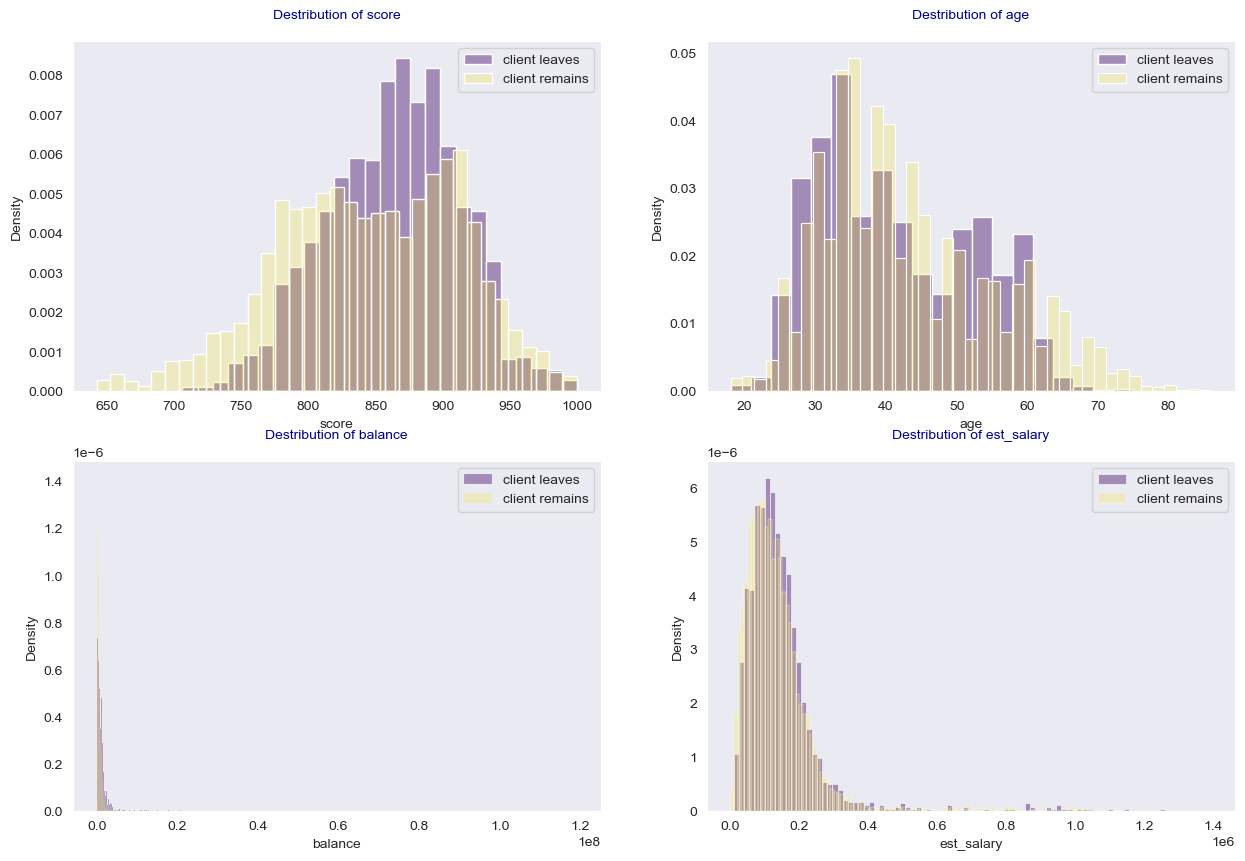

In [52]:
plt.figure(figsize = (15,10))
for i, col in enumerate(numeric[1:]):
    ax = plt.subplot(2, 2, i+1)
    sns.histplot(data = data[data['churn'] == 1][col], ax = ax, color =  '#5C2E7E', alpha = 0.5, stat = 'density', common_norm =False)
    sns.histplot(data = data[data['churn'] == 0][col], ax = ax, color = '#FCE700', alpha = 0.2, stat = 'density', common_norm =False)
    ax.set_title('Destribution of {}'.format(col) + "\n", fontsize = 10, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])

*For salaries and balance, let's look at separate graphs, removing outliers*

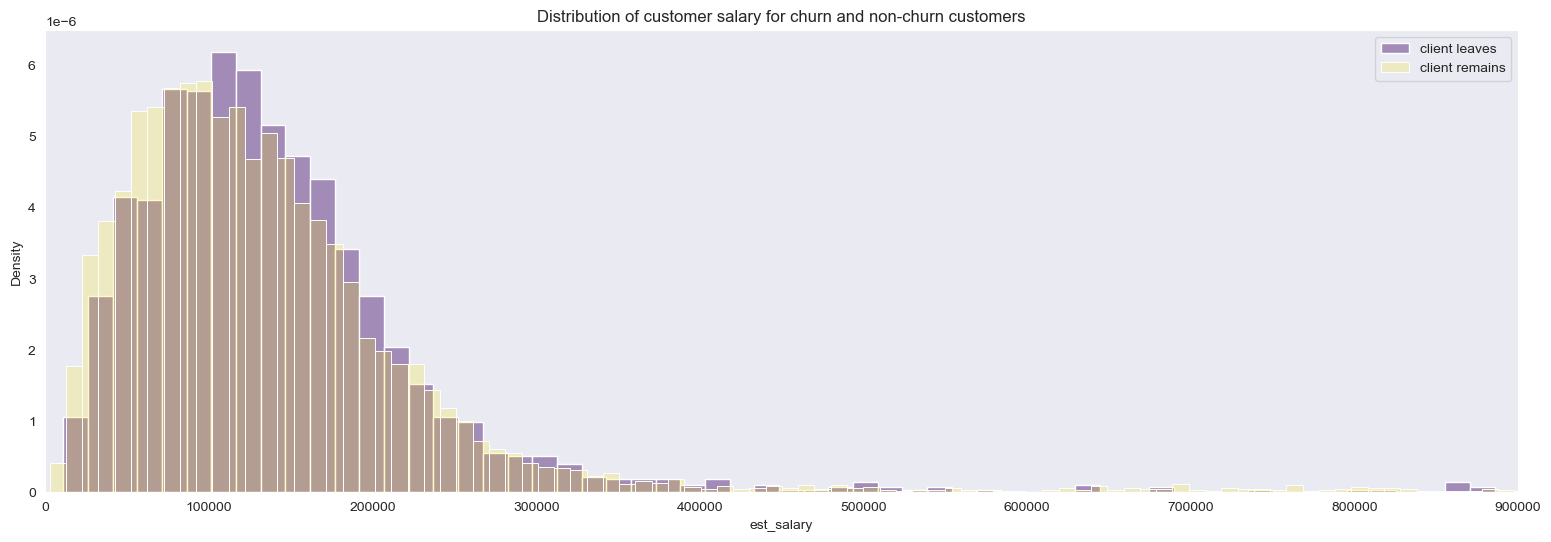

In [53]:
plt.figure(figsize=(19,6))
sns.histplot(data = data[data['churn'] == 1]['est_salary'],  color =  '#5C2E7E', alpha = 0.5, stat = 'density', common_norm =False)
sns.histplot(data = data[data['churn'] == 0]['est_salary'],  color = '#FCE700', alpha = 0.2, stat = 'density', common_norm =False)
plt.xlim(0,0.9e+06)
plt.legend(['client leaves', 'client remains'])
plt.title('Distribution of customer salary for churn and non-churn customers')
plt.show()

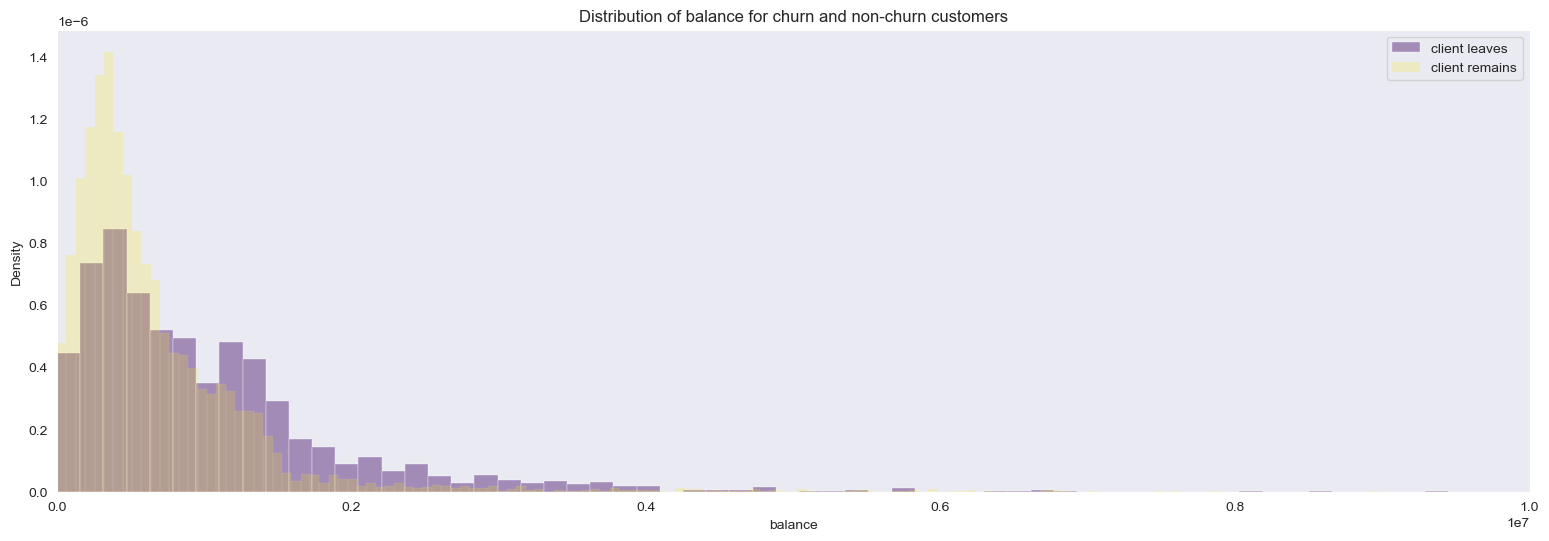

In [54]:
plt.figure(figsize=(19,6))

sns.histplot(data = data[data['churn'] == 1]['balance'],  color =  '#5C2E7E', alpha = 0.5, stat = 'density', common_norm =False)
sns.histplot(data = data[data['churn'] == 0]['balance'],  color = '#FCE700', alpha = 0.2, stat = 'density', common_norm =False)
plt.title('Distribution of balance for churn and non-churn customers')
plt.xlim(0,1.0e+07)
plt.legend(['client leaves', 'client remains'])
plt.show()

*From the graphs, we see the following trends:*

*Customers with a low customer rating (<700), as well as older customers (>70), stay with the bank. (However, there is a possibility that older customers do not declare their leaving the bank due to passing away) Middle-aged customers (30-40 years old) leave the bank more often than others.*

*Also noteworthy is the retention of low-income clients with low customer ratings.*

### Let's consider the difference between the categorical characteristics of customers

*Now let's look at the distribution of retained and departing customers by categorical features. We will also call graphs by a cycle*

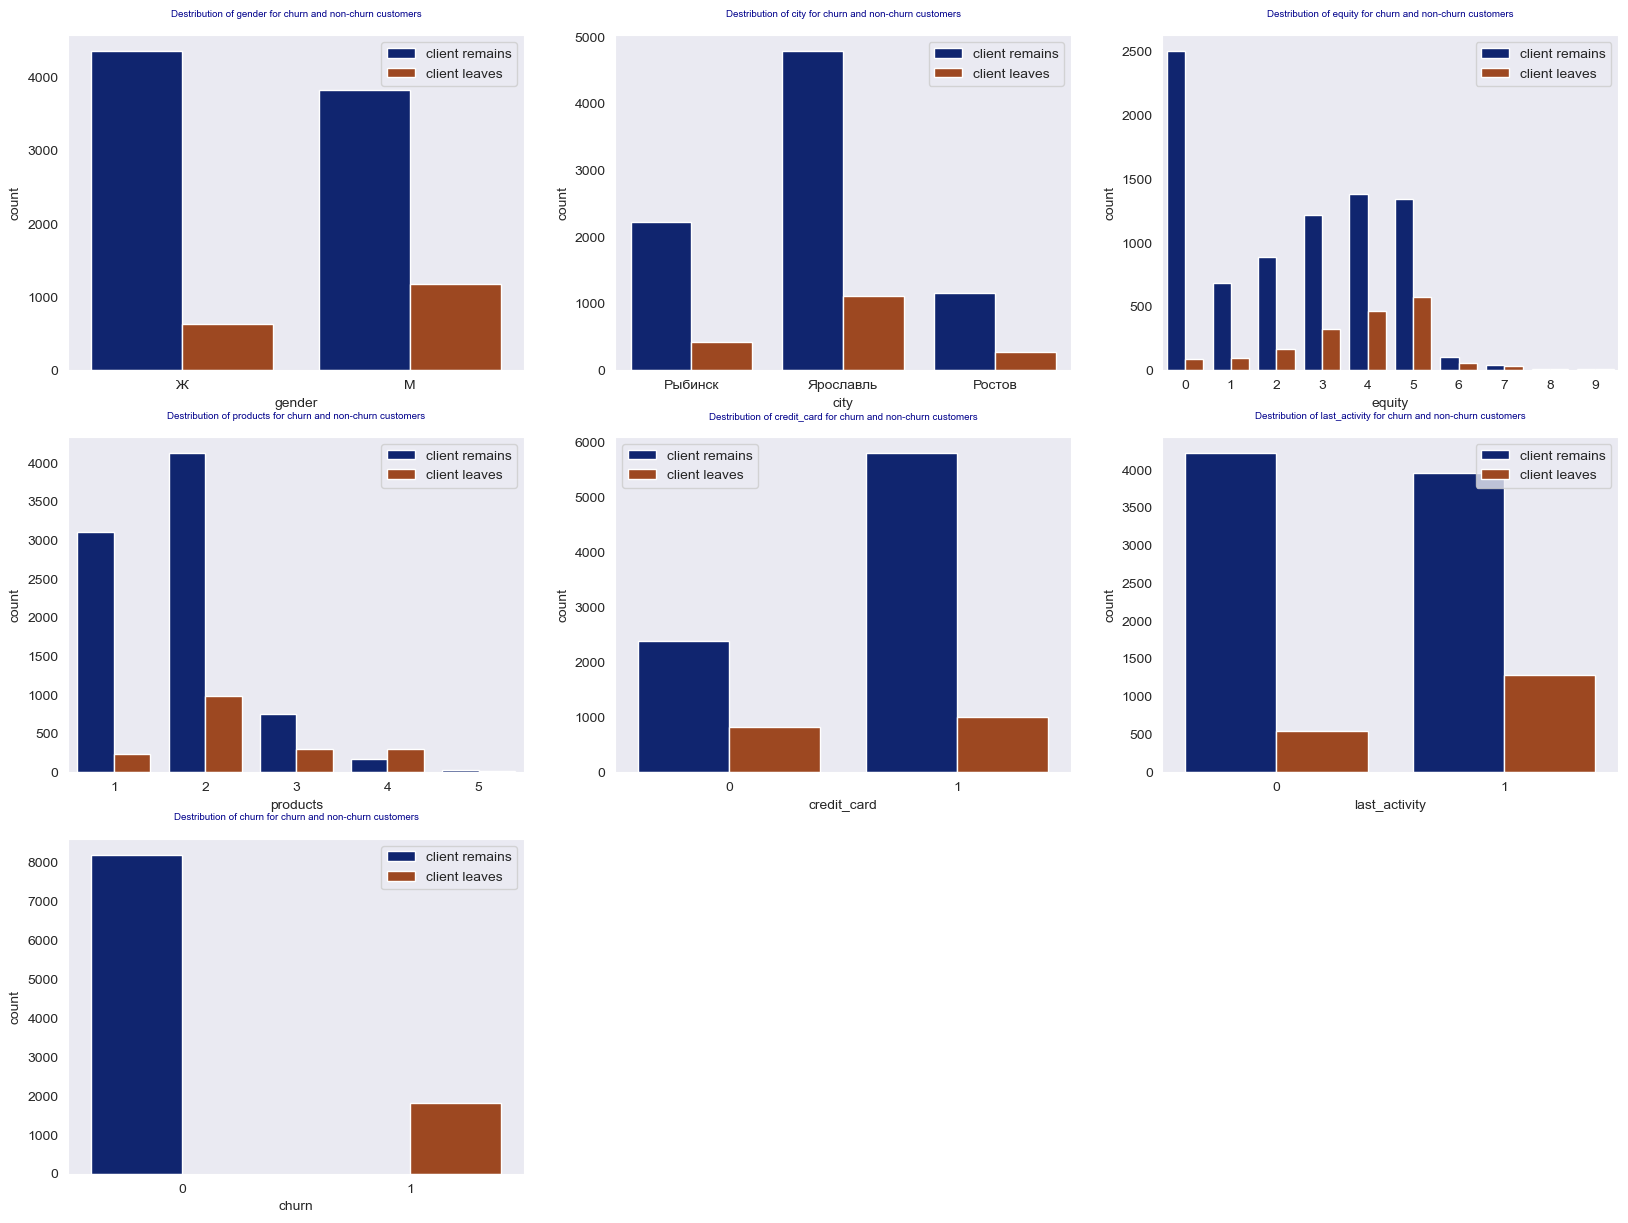

In [55]:
plt.figure(figsize = (20,20))
for i, col in enumerate(categorial[1:]):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(data = data, x = col, hue = 'churn', dodge = True, palette='dark')
    ax.set_title('Destribution of {} for churn and non-churn customers'.format(col) + "\n", fontsize = 7, color = 'DarkBlue')
    plt.legend(['client remains', 'client leaves'])

*According to the categorical characteristics from the graphs, the following trends follow:*

* In absolute terms, Yaroslavl has the largest number of churning clients, however, and the sample is large there. at the same time, in relative terms, more customers in Rostov are clearly flowing away. To confirm this, it is necessary to make additional groupings.

* By gender, despite the fact that there are more women clients, the most clients are men, both in relative and absolute units.

* The following trend is noteworthy: the higher the rating of the property, the greater part of the clients flow away.

* Also, a negative trend is observed among customers who use numerous bank products, and along with the distribution of active and inactive customers, it turns out that customers who have received some additional product recently are leaking, which should be checked in the future

* It can be seen that customers who use credit cards stay with the bank more often than customers without them.

### Find the proportion of churning customers by characteristics

*Let's introduce the shares of churning customers and collections for different characteristics. To do this, we will make a grouping function*

In [56]:
def get_churn(df, col):
    display(pd.DataFrame(df.groupby([col])['churn'].agg(['mean', 'count']).reset_index()).rename(columns={'mean':'churn rate'}).style.background_gradient('coolwarm').format("{:.1%}",subset='churn rate'))



In [57]:
get_churn(data, 'city')

*As mentioned above, the largest number of churned clients is in Yaroslavl and approximately the same share in Rostov. (19%)*

In [58]:
get_churn(data, 'gender')

*The proportion of male customers who churn is indeed higher (23%).*

In [59]:
get_churn(data, 'equity')

*The higher the property rating, the more customers flow away, up to 30% for a rating of 5. For a rating above 5, the sample is not enough, however, the trend is clear.*

In [60]:
get_churn(data, 'last_activity')

In [61]:
get_churn(data, 'products')

*With 3 products, 30% of the departed are observed. At the same time, the sample for a larger number is small. But it confirms our assumption that some additional product leaves our customers dissatisfied.*

In [62]:
get_churn(data, 'credit_card')

*If you have a credit card, there is a smaller outflow of customers in percentage terms (14.7% vs. 25.6%).*

### Let's consider the correlation of characteristics

*To consider the correlation between customer retention and other characteristics, we will build a correlation matrix, which will be based on the Phik (𝜙k) correlation coefficient, since it describes not only a linear relationship between indicators, it also allows you to see the relationship between continuous and categorical variables, in contrast to the standard Spearman coefficients and Pearson.*

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'gender_code', 'yaroslavl', 'ribinsk', 'rostov']


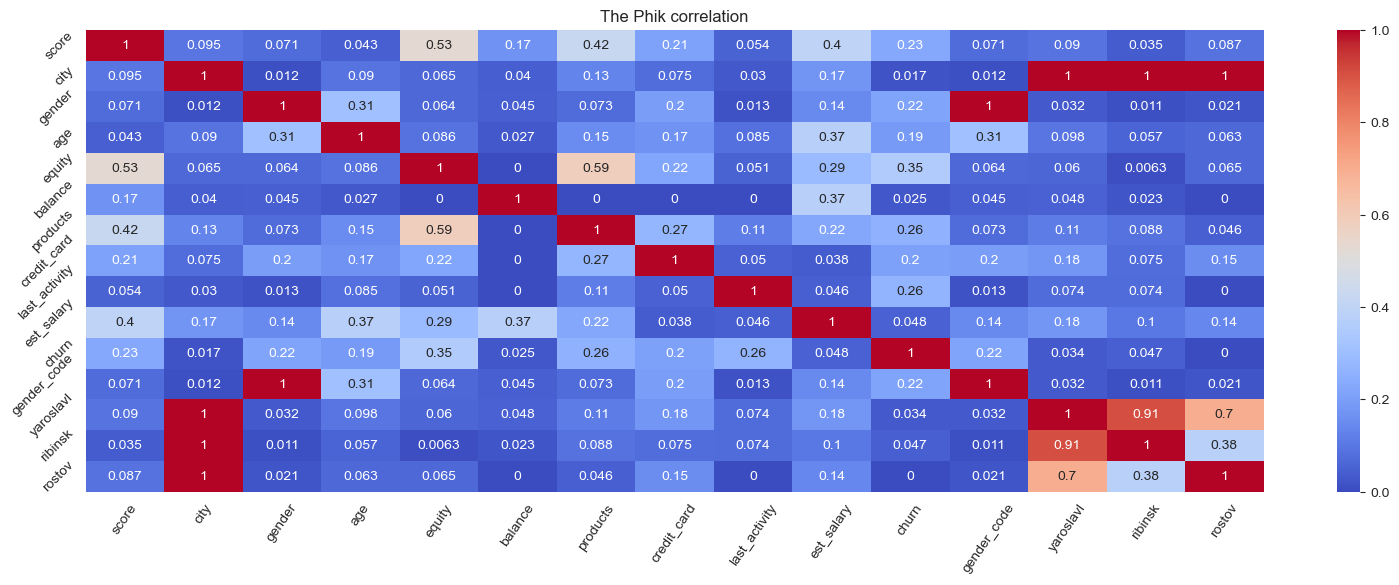

In [63]:
col = data.columns[1:] 
plt.figure(figsize = (19,6))
g = sns.heatmap(data[col].phik_matrix(), annot = True, yticklabels= col,xticklabels= col, cmap="coolwarm")
g.set_xticklabels(g.get_xticklabels(), rotation = 55)
g.set_yticklabels(g.get_yticklabels(), rotation = 45)
plt.title('The Phik correlation')
plt.show();

*From the correlation matrix for the retention parameter, only one parameter shows a moderate positive correlation (0.35 for property rating on the Chaddek scale). For other parameters, the relationship is weakly expressed. Most of all, the relationship is traced to the number of products and activities in recent times, as mentioned above.*   

### Highlight areas of retained customers

*Let's make functions for plotting Scatter, Joinplot, KDE charts.*

In [64]:
def get_scat(df,col_1,col_2):
    plt.figure(figsize = (19,6))
    sns.scatterplot(data = df, x = col_1, y= col_2, alpha=0.6, hue='churn', s = 200, palette= "bright" )
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.show()


In [65]:
def get_joint(df,col_1,col_2):
    plt.figure(figsize = (100,10))
    sns.jointplot(data=df,  x = col_1, y= col_2, height= 20 , alpha=0.6, hue='churn', s = 200, palette= "bright" )
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.show();

In [66]:
def get_kde(df,col_1,col_2):
    plt.figure(figsize = (19,6))
    sns.kdeplot(data=df,  x = col_1, y= col_2,  alpha=0.9, hue='churn',  palette= "bright" )
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.show();

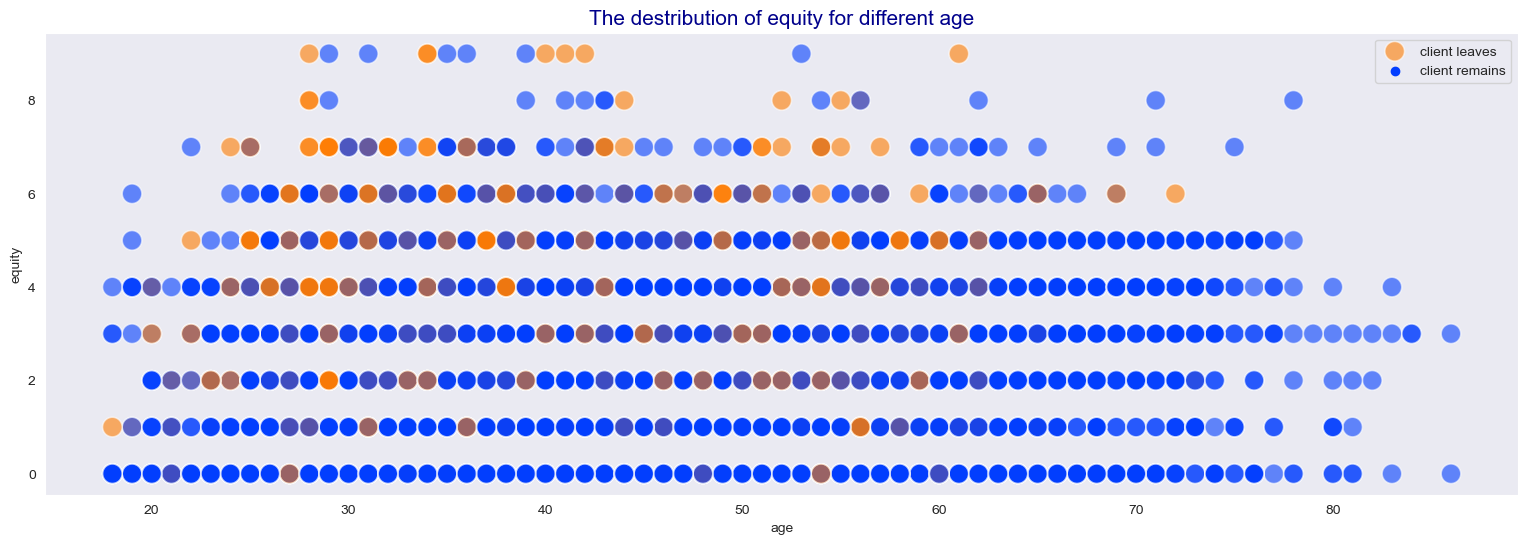

In [67]:
get_scat(data,'age','equity')

<Figure size 10000x1000 with 0 Axes>

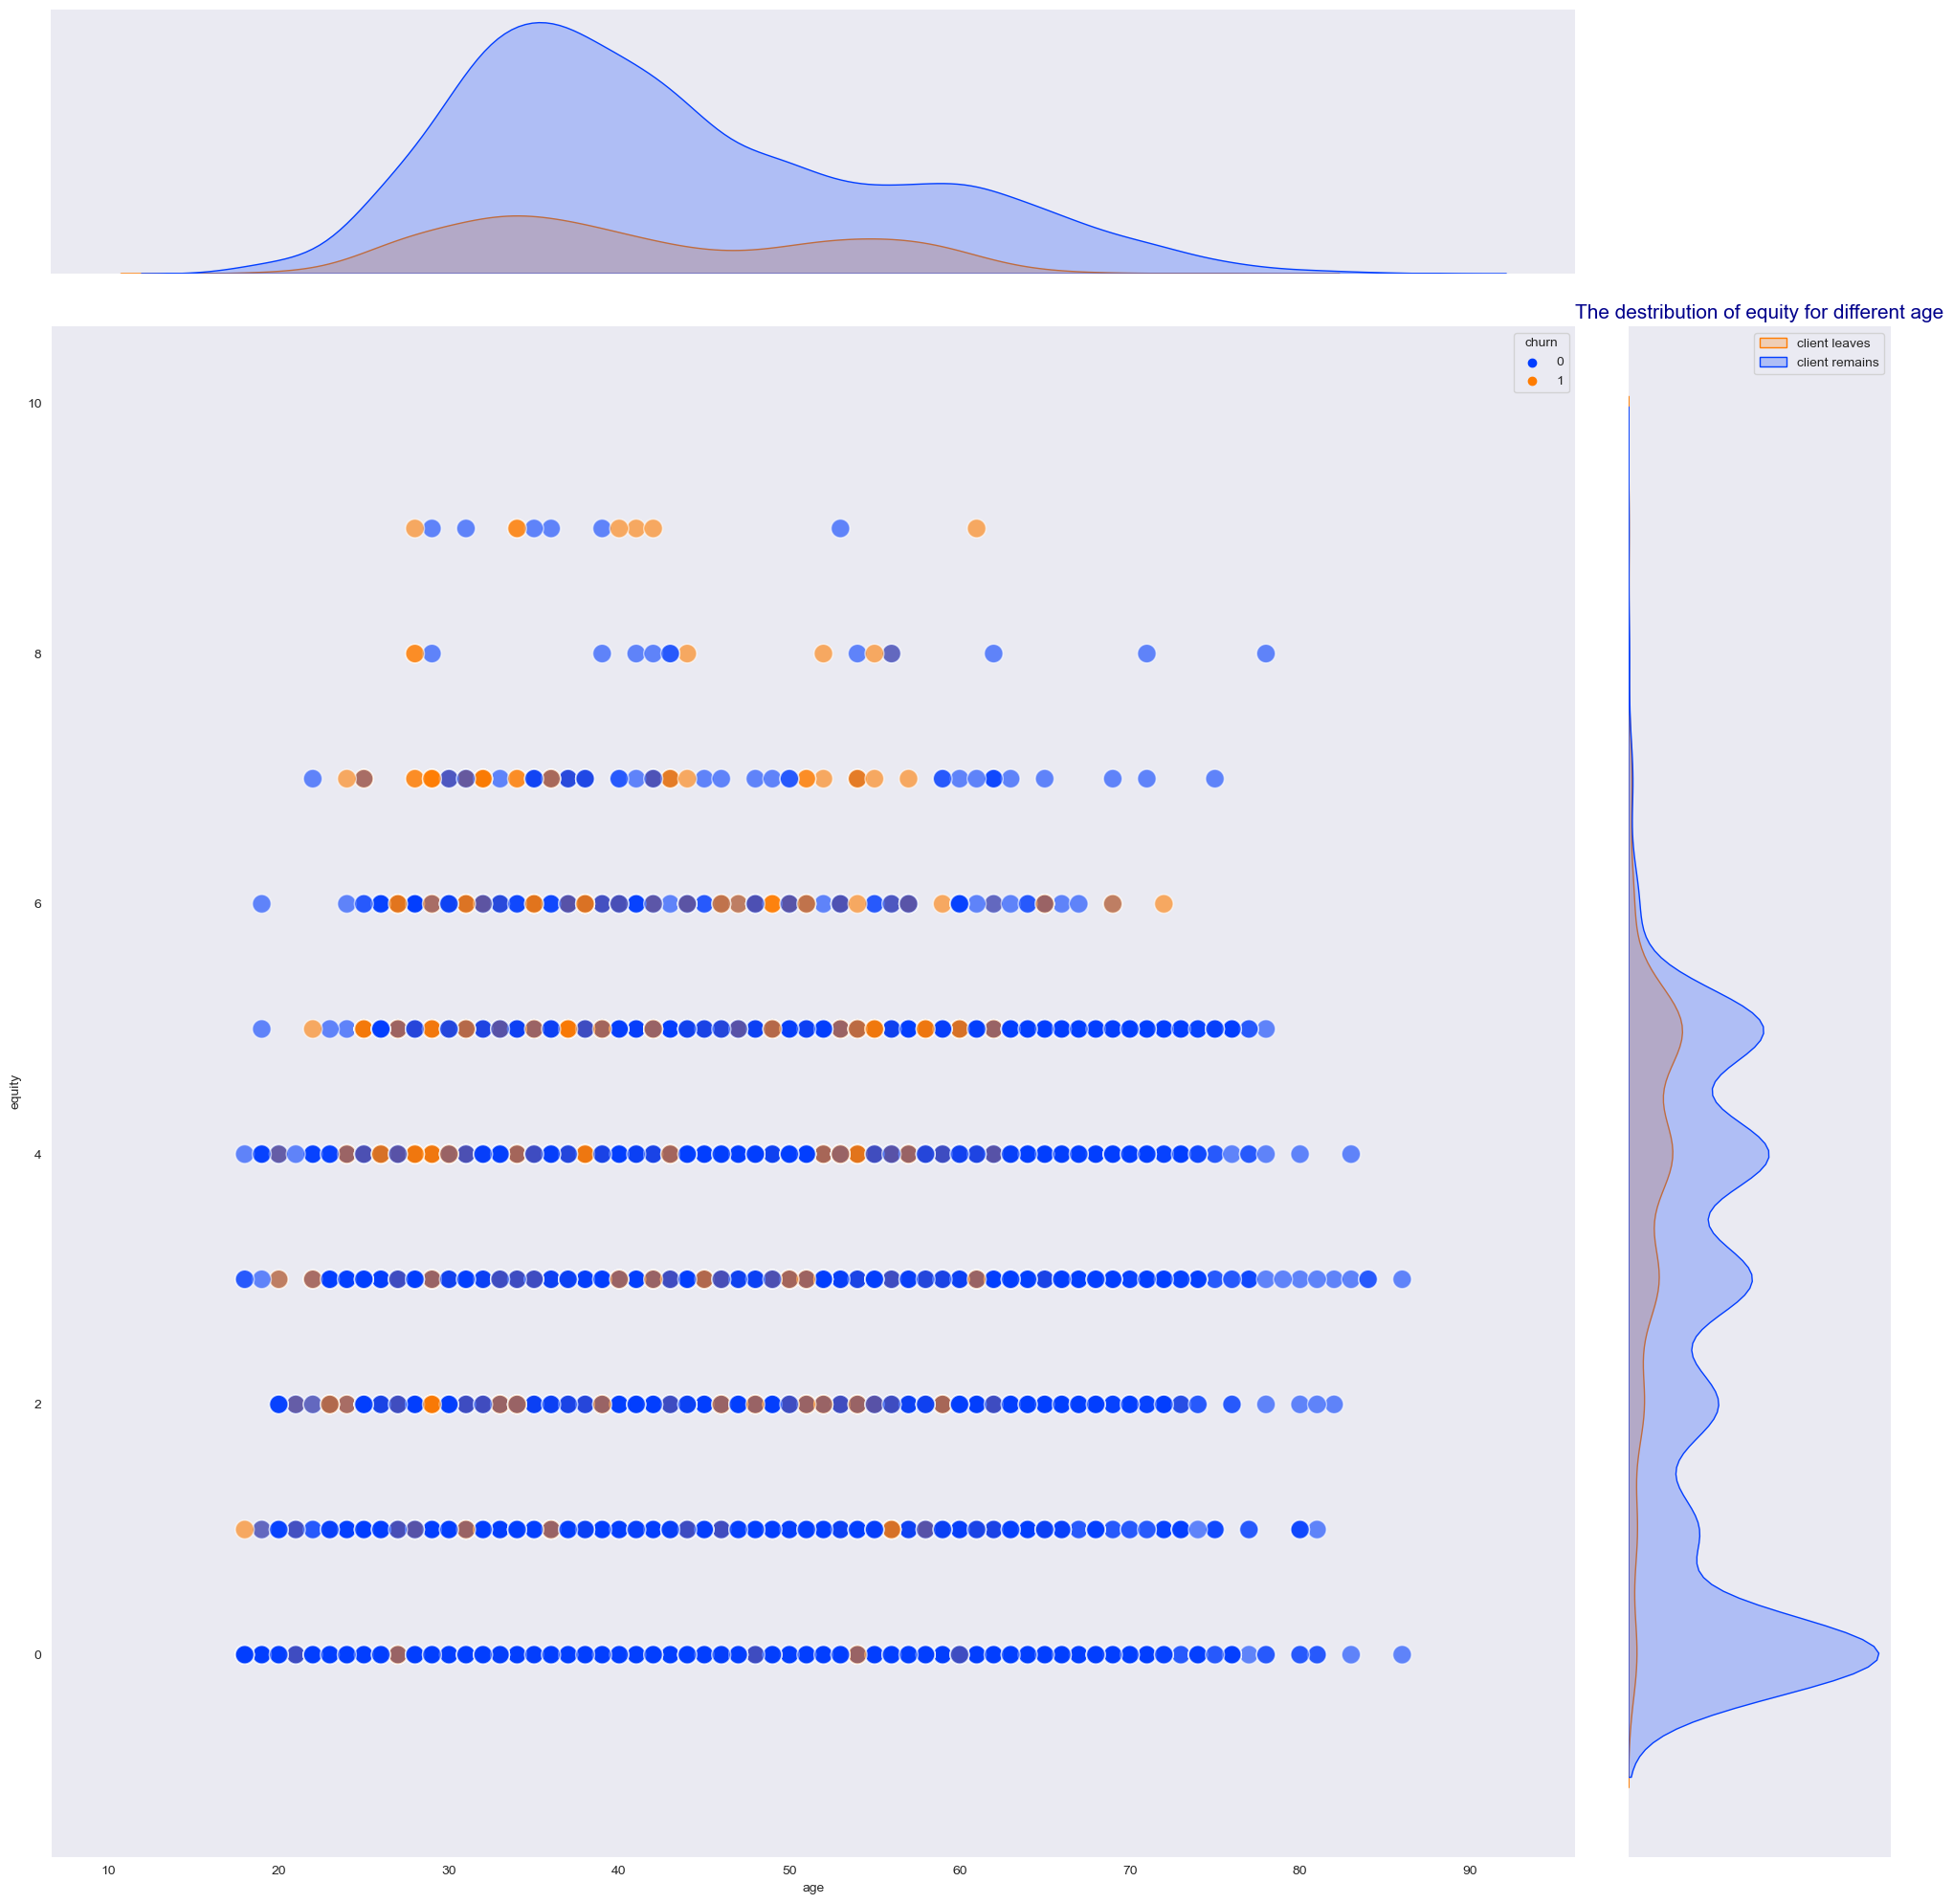

In [68]:
get_joint(data,'age','equity');

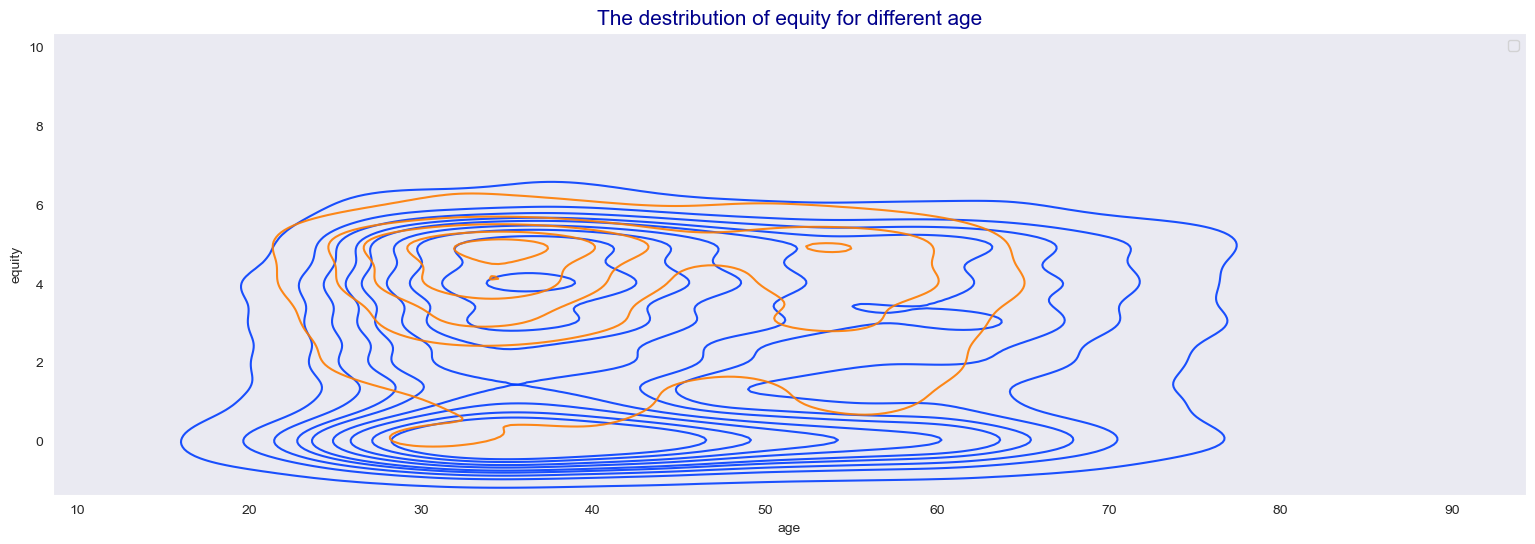

In [69]:
get_kde(data,'age','equity')

*For the combination of age and property rating, we see that the most retained clients are those with property ratings of 0 of any age. At the same time, middle-aged people (30-40 years old) or older people (50-60 years old) with a high rating (4-6) flow away the most. Also noteworthy is the area with elderly people with any property rating. Retention of these clients may be due to passing away (cannot report leaving).*

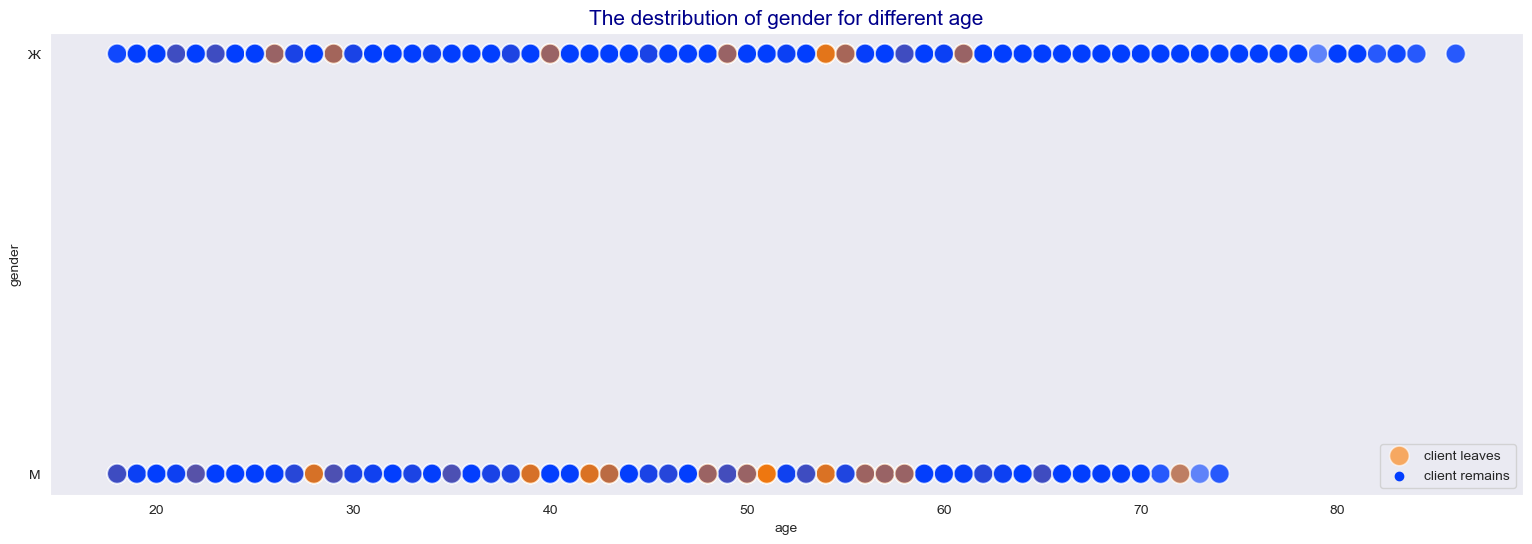

In [70]:
get_scat(data,'age','gender')

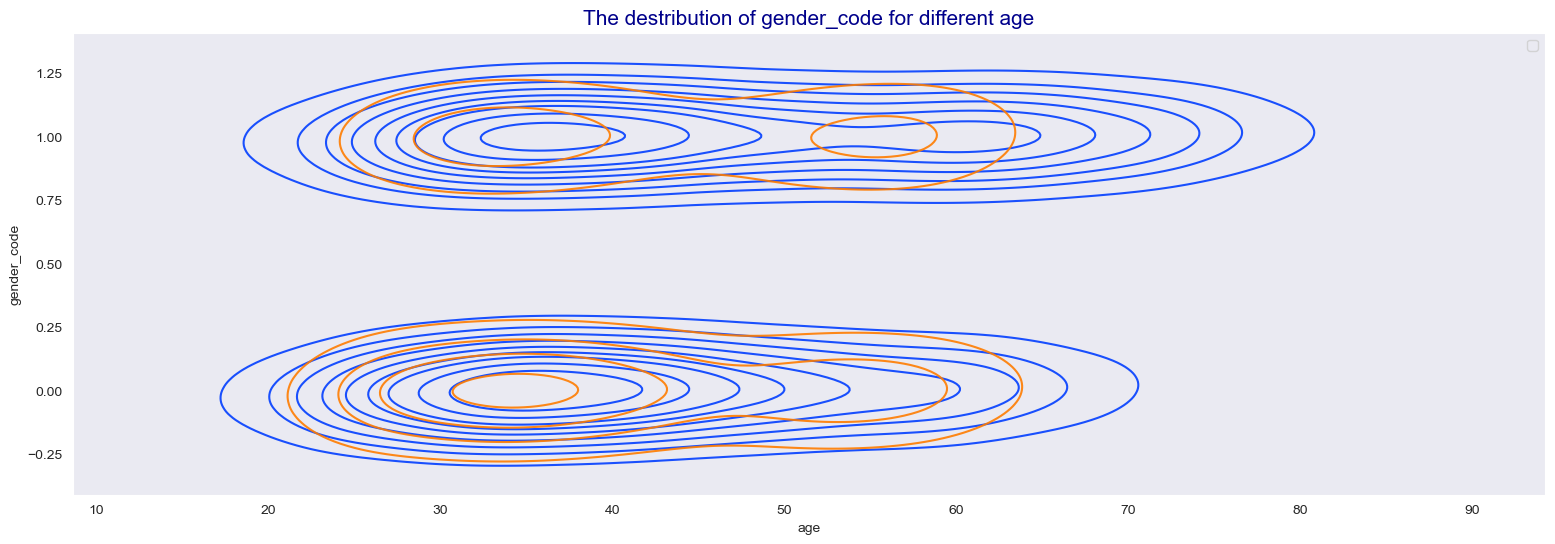

In [71]:
get_kde(data,'age','gender_code')

*If we consider the combination of sex and age, then more often men aged 39 to 60 flow away, women also have two peaks that were identified earlier than 30-40 years and 55-60 years*

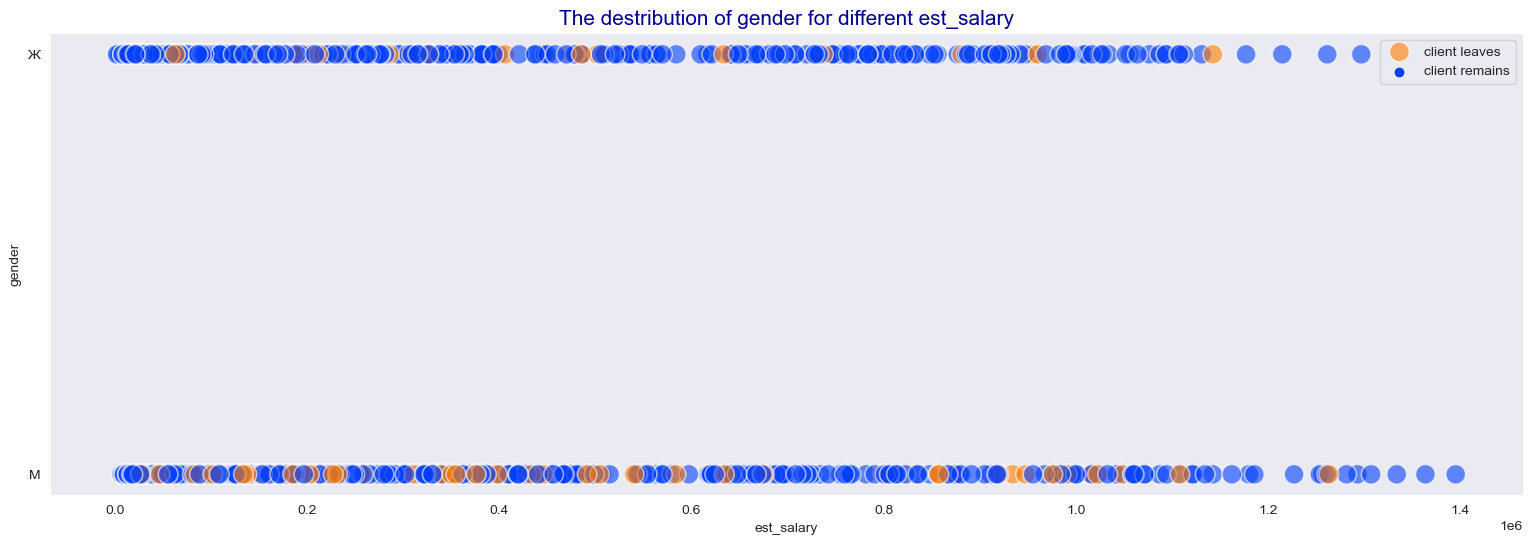

In [72]:
get_scat(data,'est_salary', 'gender')

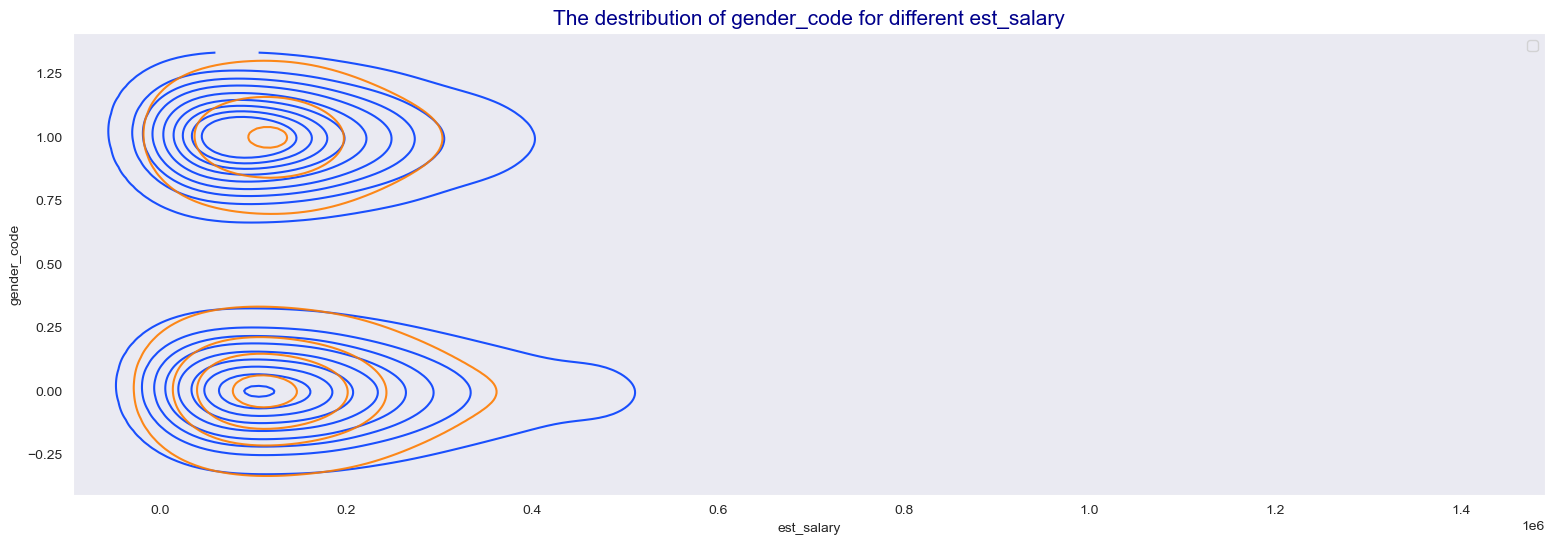

In [73]:
get_kde(data,'est_salary','gender_code')

*Low- and middle-income women are more likely to stay (between 10,000 and 100,000)*

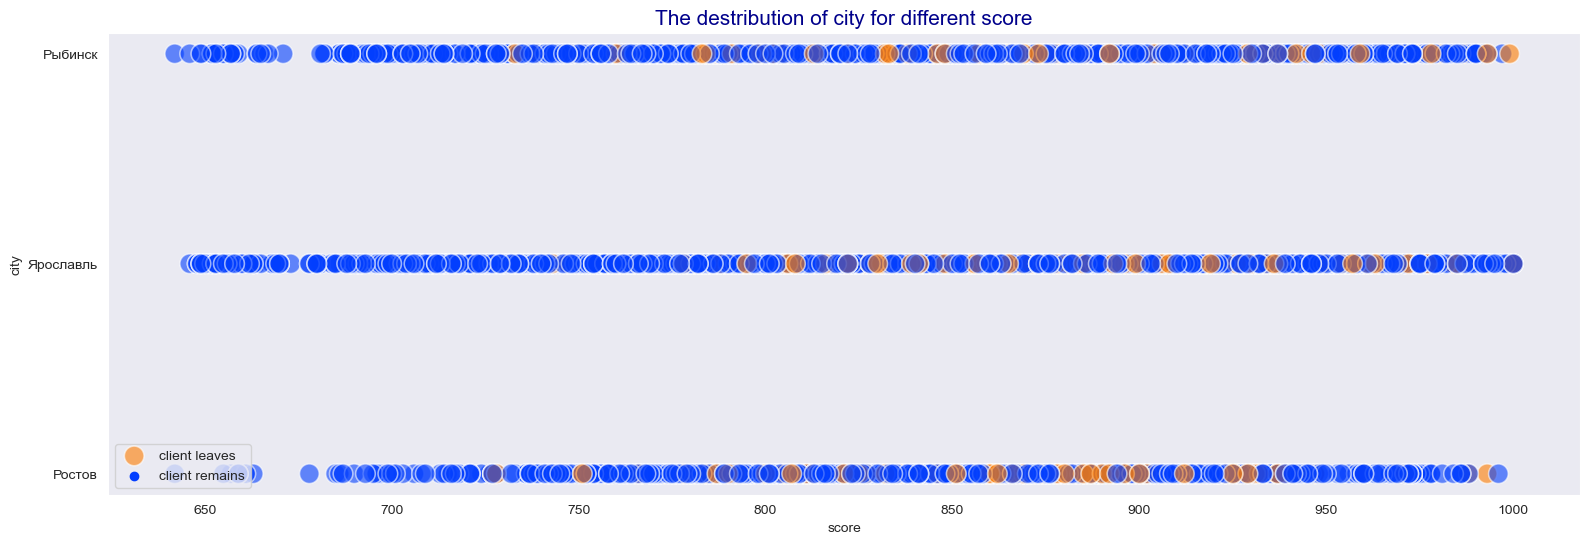

In [74]:
get_scat(data,'score', 'city')

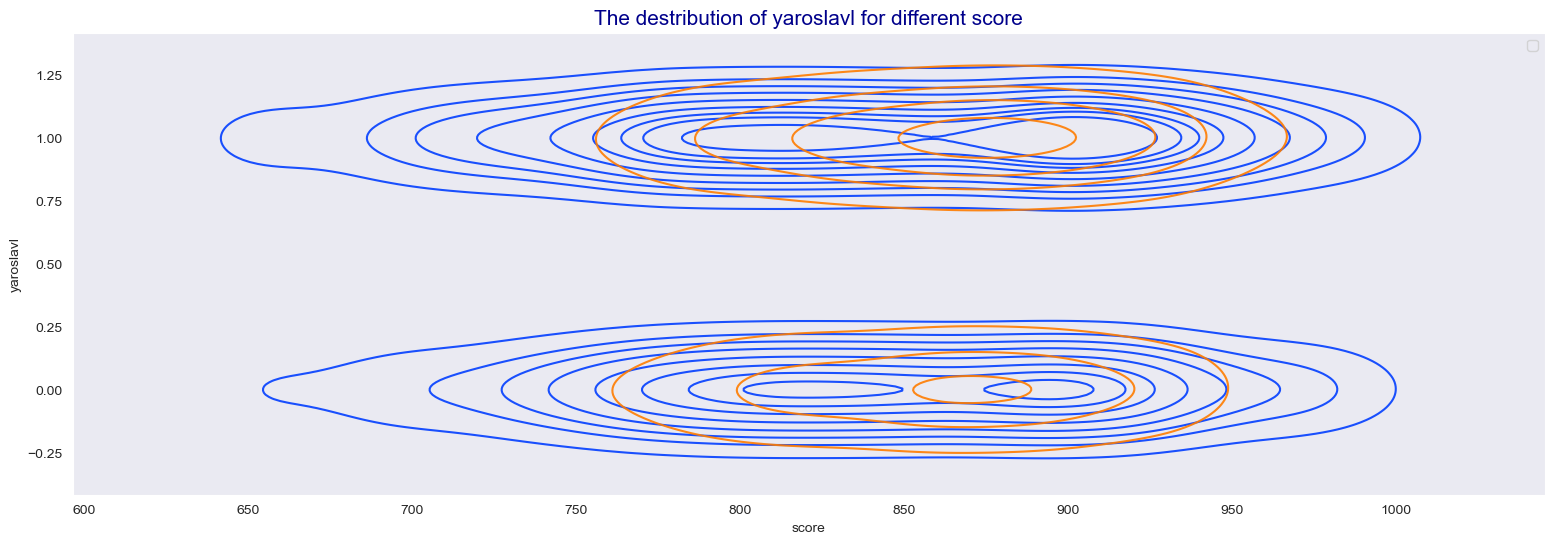

In [75]:
get_kde(data,'score','yaroslavl')

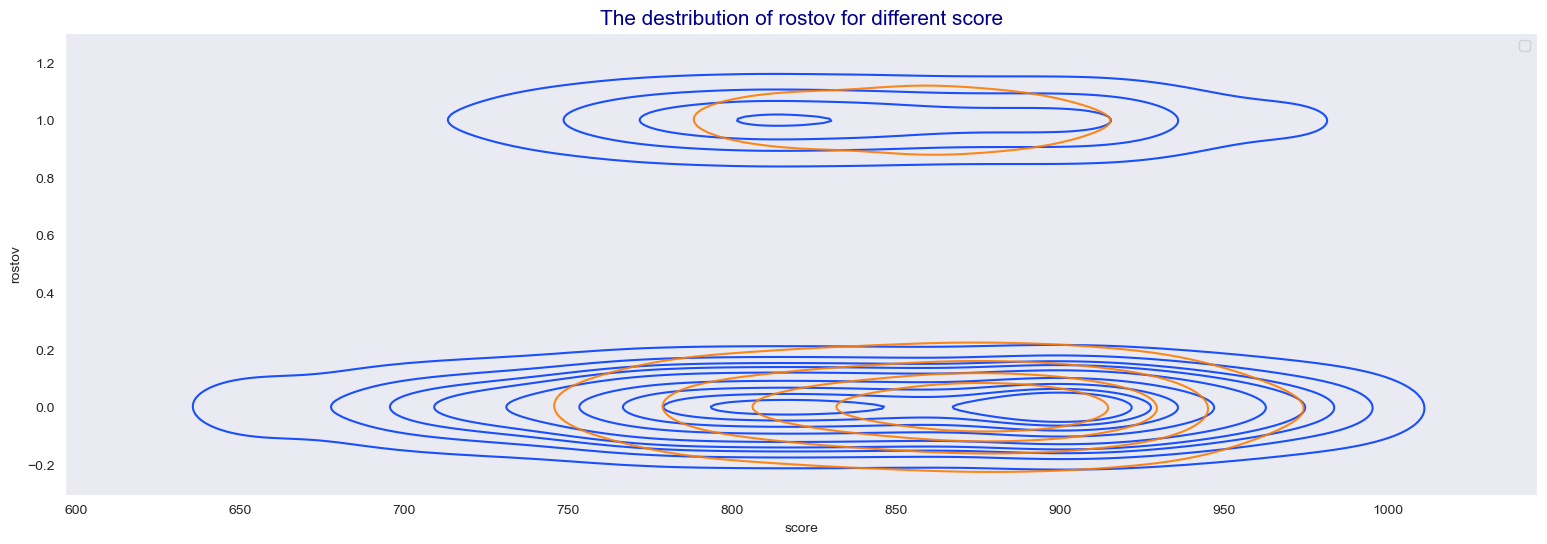

In [76]:
get_kde(data,'score','rostov')

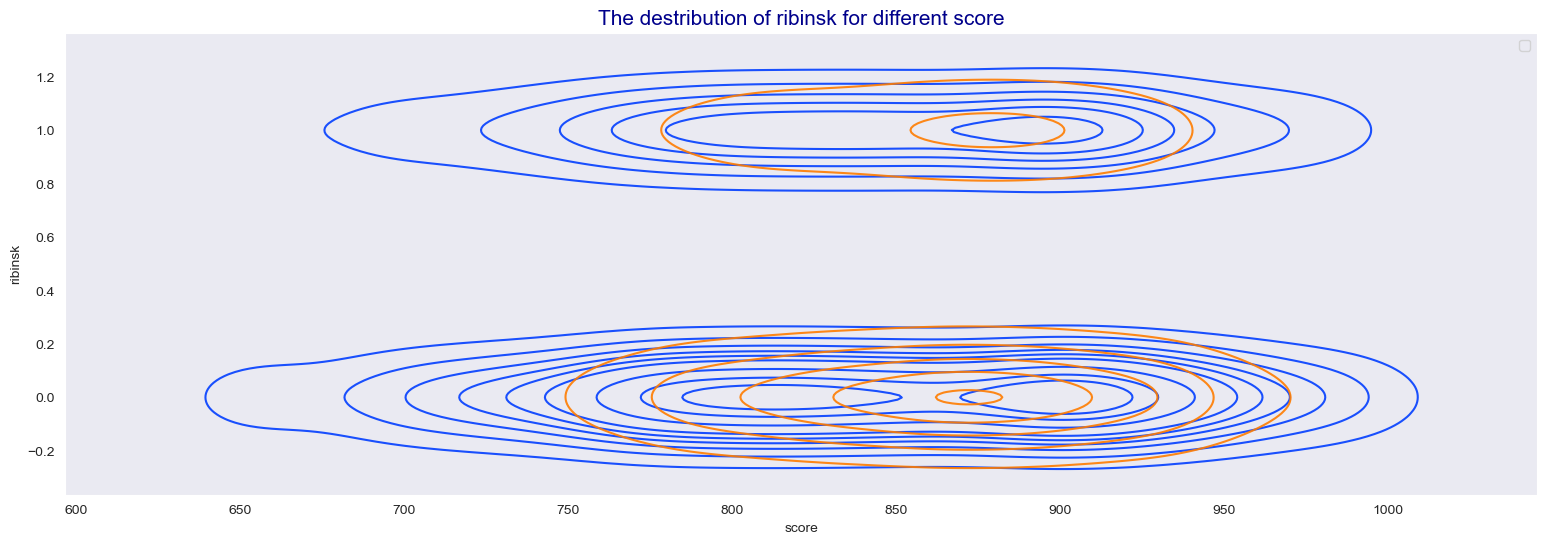

In [77]:
get_kde(data,'score','ribinsk')

*With a combination of cities and credit ratings, customers with a low rating remain in almost all cities: For Yaroslavl and Rostov, customers with a rating of 800 and below are retained, for Rybinsk, the peak is shifted but in the segment below 800.*

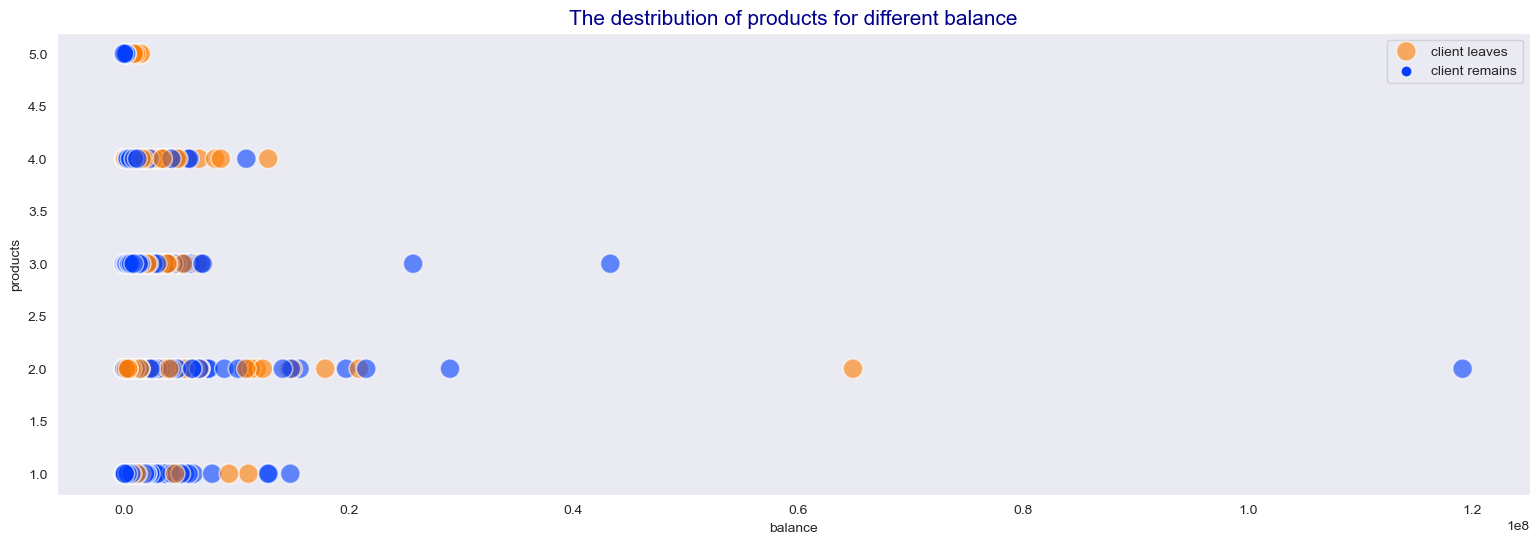

In [78]:
get_scat(data,'balance', 'products')

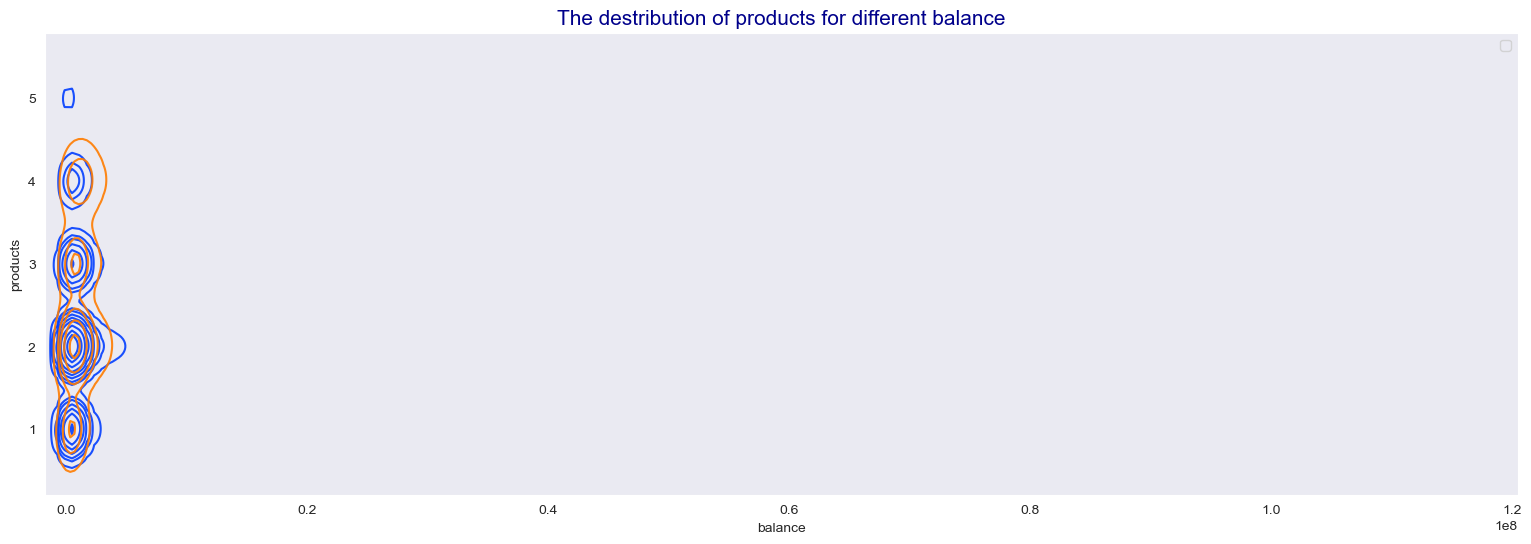

In [79]:
get_kde(data,'balance', 'products')

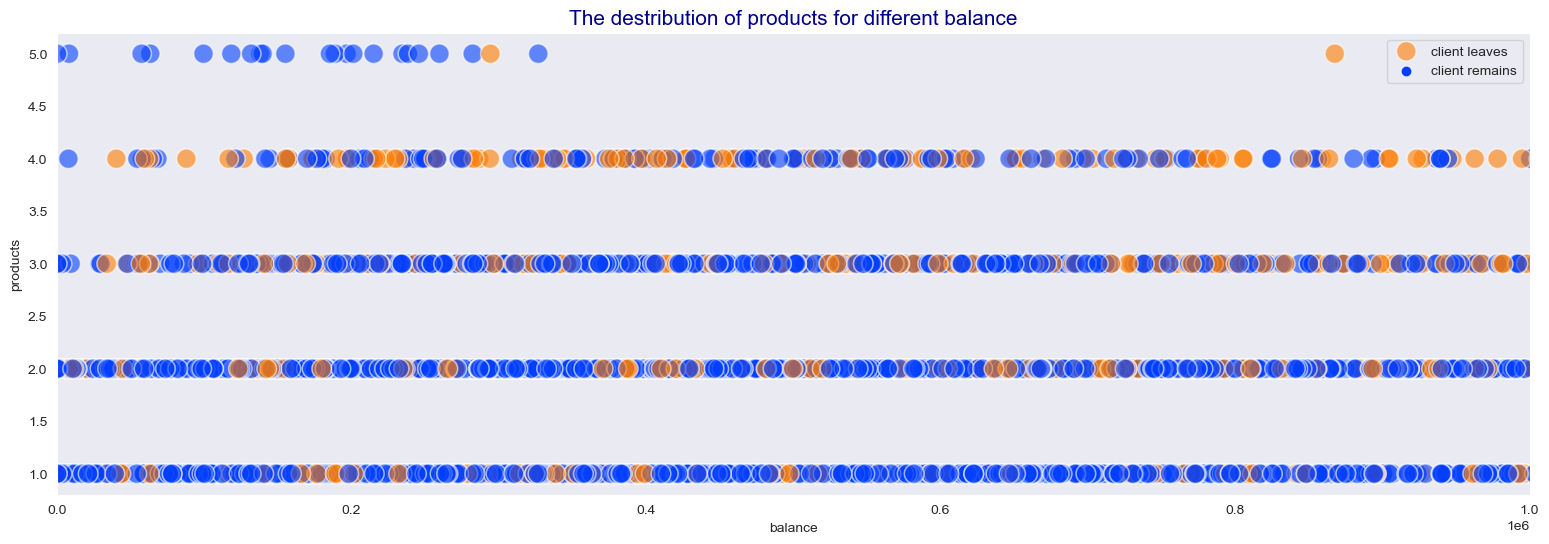

In [80]:
def get_scat(df,col_1,col_2):
    plt.figure(figsize = (19,6))
    sns.scatterplot(data = df, x = col_1, y= col_2, alpha=0.6, hue='churn', s = 200, palette= "bright")
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.xlim(0,1.0e+06)
    plt.show()
get_scat(data,'balance', 'products')


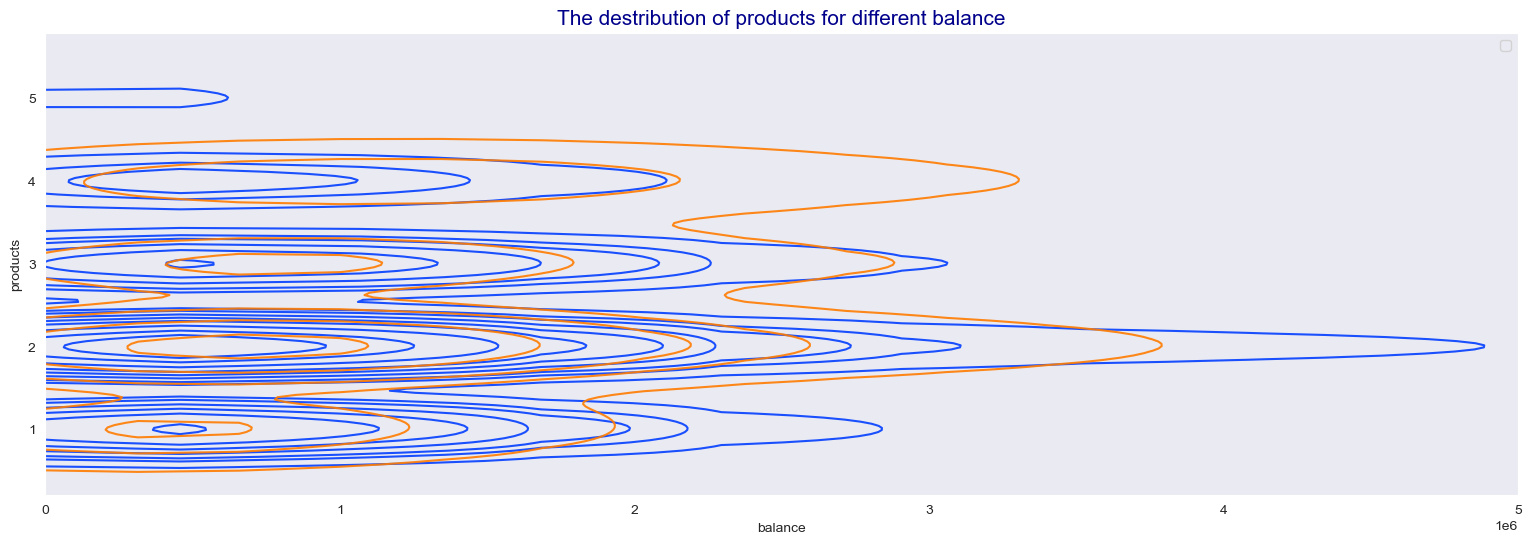

In [81]:
def get_kde(df,col_1,col_2):
    plt.figure(figsize = (19,6))
    sns.kdeplot(data=df,  x = col_1, y= col_2,  alpha=0.9, hue='churn',  palette= "bright" )
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.xlim(0,5e+06)
    plt.show();
get_kde(data,'balance', 'products')    


*Both with outliers (very high account balances and without them), it can be seen that people with a small amount of money on balance and one product of the bank are mostly retained.*

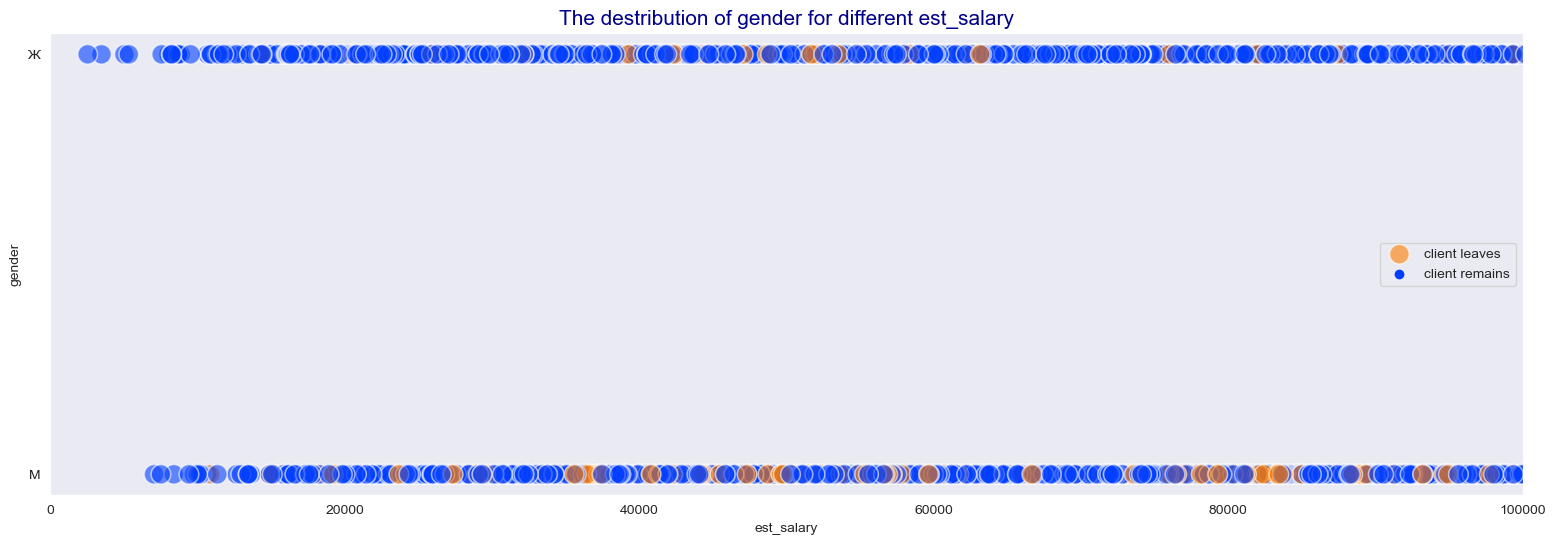

In [82]:
def get_scat(df,col_1,col_2):
    plt.figure(figsize = (19,6))
    sns.scatterplot(data = df, x = col_1, y= col_2, alpha=0.6, hue='churn', s = 200, palette= "bright")
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.title('The destribution of {} for different {}'.format ((col_2),(col_1)),fontsize = 15, color = 'DarkBlue')
    plt.legend(['client leaves', 'client remains'])
    plt.xlim(0,1.0e+05)
    plt.show()
get_scat(data,'est_salary', 'gender')

*If we get rid of salary spikes, we also see that women with salaries under 100,000 are retained the best.*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
     <br/> 1. Clients with a low client rating (<700), as well as elderly clients (>70), stay with the bank. Life Clients of middle age (30-40 years old), as well as older ones (50-60 years old), leave the bank more often than others.
     <br/>2. In absolute terms, Yaroslavl has the largest number of churning clients, however, and the sample is large there. While in a relative sense. The same share of customers in Rostov is leaking - 19%.
     <br/>3. By gender, despite the fact that there are more women clients, most clients are men, both in relative and absolute units. The share of male clients who leave is 23%.
     <br/>4. The following trend is noteworthy: the higher the rating of the property, the greater part of the clients flow away. Up to 30% for a property rating of 5. For a rating above 5, the samples are small for conclusions. At the same time, the correlation of leakage with this characteristic showed a moderate relationship.
     <br/>5. Also, a negative trend is observed among customers who use numerous bank products, and along with the distribution of active and inactive customers, it turns out that customers who have received some additional product recently are flowing away, this is confirmed by the correlation matrix. With 3 products, 30% of the departed are observed. At the same time, the sample for a larger number is small.
     <br/>6. It can be seen that customers who use credit cards stay with the bank more often than customers without them (14.7% vs. 25.6%).
    
  Let's check the conclusions statistically
    

## Hypothesis testing
<a id="hypot"></a>

*Let us formulate the main hypotheses that it is important for us to test:* 

```H0: The average income between retained and abandoned clients does not differ.```
    ```H1: The average income between retained and abandoned clients is different.```
   
```H0: The average credit score between retained and abandoned clients does not differ.```
    ```H1: The average credit score between retained and abandoned customers is different.```
   
```H0: The average age between retained and abandoned clients does not differ.```
    ```H1: The average age between retained and abandoned clients is different.```
   
```H0: There is no difference in gender shares in the sample between retained and abandoned clients.```
    ```H1: Gender shares in the sample between retained and abandoned clients are different.```
   
```H0: People with and without a credit card in the sample do not differ between retained and abandoned customers.```
    ```H1: People with and without a credit card differ in the sample between retained and abandoned customers.```

### Testing the income comparison hypothesis

*Let's write a function about checking for the normality of the Wilco-Shapiro criterion and QQ graphs*

In [83]:
def shapiro_test (sample_1, sample_2):
    alpha = 0.05
    results_1 = st.shapiro(sample_1)
    p_value_1  = results_1[1]
    print(' first p-value: ', p_value_1)
    results_2 = st.shapiro(sample_2)
    p_value_2  = results_2[1]
    print(' second p-value: ', p_value_1)
    if p_value_1 < alpha:
        print('We reject the null hypothesis for the first sample: the distribution is not normal')
    else:
        print('Failed to reject the null hypothesis, the first sample is normally distributed')
    if p_value_2 < alpha:
        print('We reject the null hypothesis for the second sample: the distribution is not normal')
    else:
        print('Failed to reject the null hypothesis, the second sample is normally distributed')    
        

In [84]:
def qq_plot(sample_1, sample_2):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    st.probplot(sample_1, dist="norm", plot=pylab)
    plt.title('Where churn = 0')
    
    plt.subplot(1,2,2)
    st.probplot(sample_2, dist="norm", plot=pylab)
    plt.title('Where churn = 1')
    pylab.show()

*Let's apply the functions to test for the normality of the distribution of customer income*

In [85]:
warnings.filterwarnings("ignore")

In [86]:
shapiro_test(data[data['churn'] == 0]['est_salary'], data[data['churn'] != 0]['est_salary'])

 first p-value:  0.0
 second p-value:  0.0
We reject the null hypothesis for the first sample: the distribution is not normal
We reject the null hypothesis for the second sample: the distribution is not normal


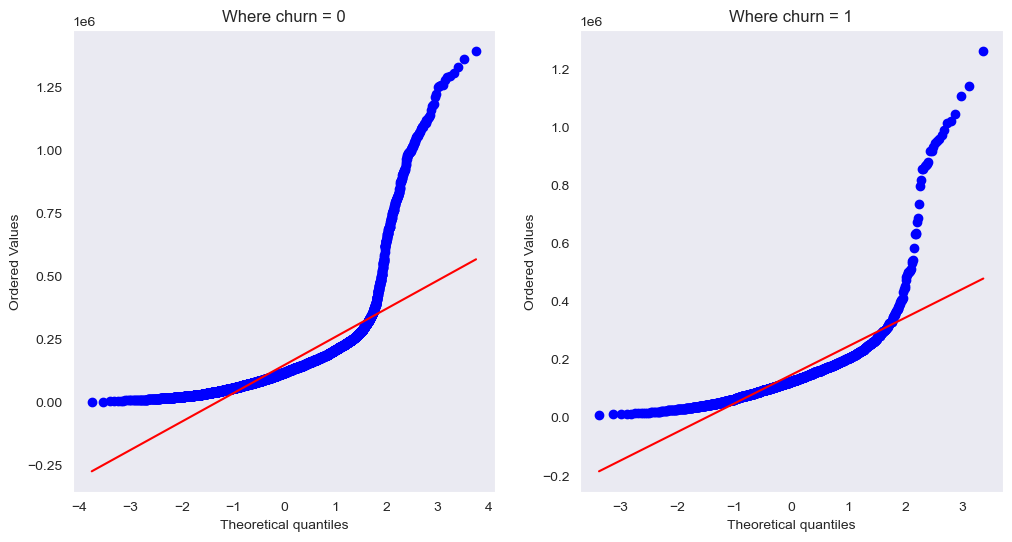

In [87]:
qq_plot(data[data['churn'] == 0]['est_salary'], data[data['churn'] != 0]['est_salary'])

**Student's t-test** is a general name for statistical tests in which the test statistic has a Student's distribution. Most often, t-tests are used to test the equality of the means in two samples. The null hypothesis assumes that the means are equal (negation of this assumption is called the shift hypothesis).

**All varieties of Student's t-test are parametric and are based on an additional assumption about the normality of the data sample (Sample means are normally distributed)**. Therefore, it is recommended to perform a normality check before applying Student's t-test. If the normality hypothesis is rejected, other distributions can be tested, if they do not fit, then nonparametric statistical tests should be used.
    
The Shapiro-Wilk test is used to test the hypothesis H_0: "the random variable X is normally distributed" and is one of the most effective tests for normality. Criteria testing the normality of a sample are a special case of goodness-of-fit criteria. If the sample is normal, you can then apply powerful parametric tests, such as Fisher's test.
    
The Fisher criterion is used to check the equality of the variances of two samples and is also one of the conditions for applying the T-test. Therefore, we must test for normal distribution to consider applying Student's t-test

*The normality check showed that t-test is not applicable, so we will use the Mann-Whitney test, for this we will also write a function*

In [88]:
def mannwhitn (sample_1, sample_2):
    alpha = 0.05
    results = st.mannwhitneyu(sample_1, sample_2)
    print('p-value: ', results.pvalue)
    if results.pvalue < alpha:
        print('Reject the null hypothesis: the difference is statistically significant')
    else:
        print('Failed to reject null hypothesis, no difference can be inferred')
    

We test the hypothesis by comparing the income of retained and churned customers:

```H0: The average income between retained and abandoned clients does not differ.```

 ```H1: The average income between retained and abandoned clients is different.```
   
    Significance level set to 0.05

In [89]:
mannwhitn (data[data['churn'] == 0]['est_salary'], data[data['churn'] != 0]['est_salary'])

p-value:  0.00021719724757968803
Reject the null hypothesis: the difference is statistically significant


In [90]:
print ('The average of salary of non-chain costumers in the data frame is   {}'.format(data[data['churn'] != 0]['est_salary'].mean()))
print ('The average of salary of chain costumers in the data frame is   {}'.format(data[data['churn'] == 0]['est_salary'].mean()))

The average of salary of non-chain costumers in the data frame is   148267.6028226248
The average of salary of chain costumers in the data frame is   147764.04767640945


### Проверка гипотезы о сравнении  кредитных рейтингов

*Let's do a normality test first.*

In [91]:
shapiro_test(data[data['churn'] == 0]['score'], data[data['churn'] != 0]['score'])

 first p-value:  4.0872017487051877e-26
 second p-value:  4.0872017487051877e-26
We reject the null hypothesis for the first sample: the distribution is not normal
We reject the null hypothesis for the second sample: the distribution is not normal


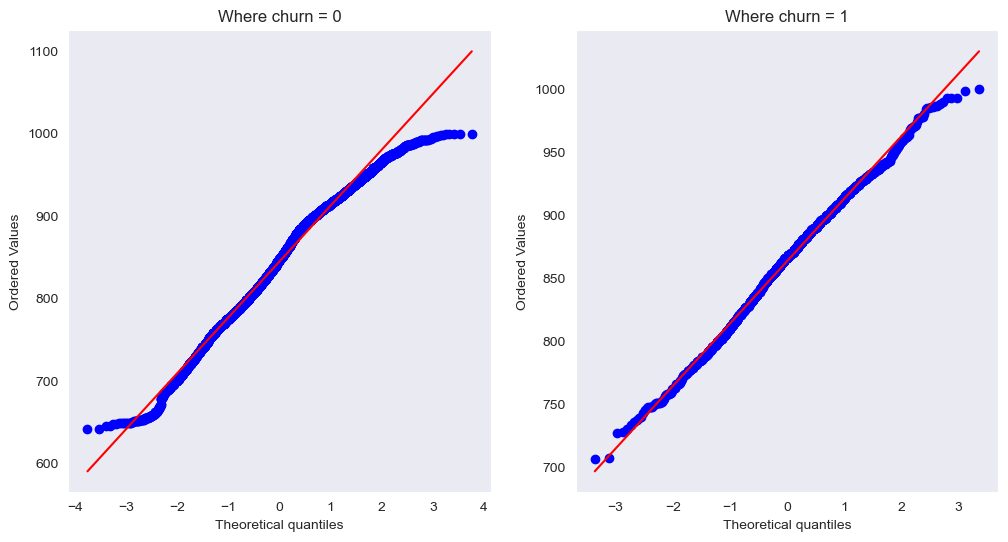

In [92]:
qq_plot(data[data['churn'] == 0]['score'], data[data['churn'] != 0]['score'])

*Thus, we also carry out a test using the Mann-Whitney* 

We test the hypothesis by comparing the income of retained and churned customers:

```H0: The average credit score between retained and abandoned clients does not differ.```

```H1: The average credit score between retained and abandoned customers is different.```
   
      Significance level set to 0.05

In [93]:
mannwhitn (data[data['churn'] == 0]['score'], data[data['churn'] != 0]['score'])

p-value:  5.65941935372816e-22
Reject the null hypothesis: the difference is statistically significant


In [94]:
print ('The average of score of non-chain costumers in the data frame is   {}'.format(data[data['churn'] != 0]['score'].mean()))
print ('The average of score of chain costumers in the data frame is   {}'.format(data[data['churn'] == 0]['score'].mean()))

The average of score of non-chain costumers in the data frame is   863.3602416254805
The average of score of chain costumers in the data frame is   845.4107863519628


### Testing the Hypothesis of Age Difference

*We also check the samples for normality*

In [95]:
shapiro_test(data[data['churn'] == 0]['age'], data[data['churn'] != 0]['age'])

 first p-value:  1.961817850054744e-44
 second p-value:  1.961817850054744e-44
We reject the null hypothesis for the first sample: the distribution is not normal
We reject the null hypothesis for the second sample: the distribution is not normal


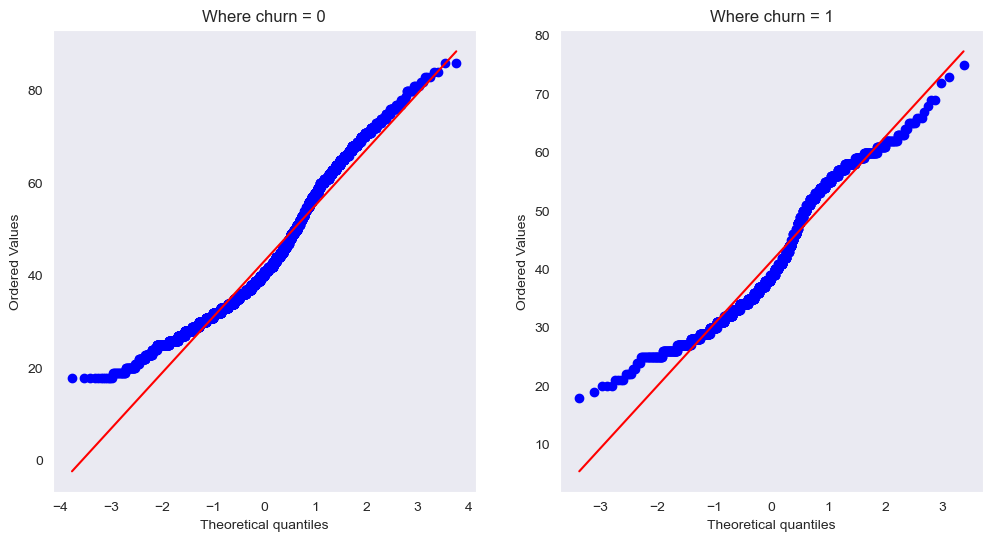

In [96]:
qq_plot(data[data['churn'] == 0]['age'], data[data['churn'] != 0]['age'])

*Samples are not normally distributed, also use the Mann-Whitney test*

 *Checking the hypothesis about the difference in the ages of the leaked and remaining customers:*
  
  ```H0: The average age between retained and abandoned clients does not differ.```
   
  ```H1: The average age between retained and abandoned clients is different.```
   
   *Level of significance is set to 0.05*

In [97]:
mannwhitn (data[data['churn'] == 0]['age'], data[data['churn'] != 0]['age'])

p-value:  3.363748602356185e-07
Reject the null hypothesis: the difference is statistically significant


In [98]:
print ('The average age of non-chain costumers in the data frame is   {}'.format(data[data['churn'] != 0]['age'].mean()))
print ('The average age of chain costumers in the data frame is   {}'.format(data[data['churn'] == 0]['age'].mean()))

The average age of non-chain costumers in the data frame is   41.38275672707304
The average age of chain costumers in the data frame is   43.15775956952427


### Testing the Gender Difference Hypothesis

*z-test is used to test the hypothesis for categorical variables*

In [99]:
def z_test (df, col):
    test_1 = df[df[col] == 0]['churn']
    test_2 = df[df[col] == 1]['churn']
    test = df['churn']

    n1 = test_1.count()
    n2 = test_2.count()
    p1 = (test_1 == 0).sum() / n1
    p2 = (test_2 == 0).sum() / n2
    p = (test == 0).sum() / len(test)
    z = (p1 - p2) / (np.sqrt(p * (1-p) * ( (1 / n1) + ( 1 / n2) )))
    print("Z - value = ", z)
    
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z))) * 2
    print('p-value: ', p_value)
    alpha = 0.05
    if p_value < alpha:
        print('We reject the null hypothesis: there is a significant difference between the proportions')
    else:
        print(
            'It was not possible to reject the null hypothesis, there is no reason to consider the proportions different'
        )
   

*Next, we test the hypothesis about the gender difference between retained and non-retained customers*

```H0: There is no difference in gender shares in the sample between retained and abandoned clients.```

```H1: Gender shares in the sample between retained and abandoned clients are different.```
   
  Significance level set to 0.05  

In [100]:
z_test (data, 'gender_code')

Z - value =  -14.09848854303451
p-value:  0.0
We reject the null hypothesis: there is a significant difference between the proportions


### Credit Card Hypothesis Testing

*We also use the z-test to test hypotheses on credit cards, since these are fractions of one sample*

*Checking the hypothesis about the presence and absence of a credit card:*

```H0: People with and without a credit card in the sample do not differ between retained and abandoned customers.```
   
```H1: People with and without a credit card differ in the sample between retained and abandoned customers.```
    
       Significance level set to 0.05

In [101]:
z_test (data, 'credit_card')

Z - value =  -13.118386739415152
p-value:  0.0
We reject the null hypothesis: there is a significant difference between the proportions


<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
      <br/> For all parameters that were tested by clients, were statistically tested, it was found that the groups evaluated and leaked have a value from each other, which may mean a strict characterization of the client's portrait based on previous findings.
    


## Drawing up portraits of retained customers (segmentation)
<a id="portr"></a>

### Data segmentation

*Since none of the indicators is normally distributed, we consider the mode as the central trend, that is, the most frequently occurring value, we will display this value for each column separately for retained and flowing bank customers*

In [102]:
data_temp = data.assign(est_salary = data.est_salary.round(-4), balance = data.balance.round(-5)).drop('userid',axis=1)
pd.concat(
    (data_temp[data['churn']==0].mode().head(1).set_axis(['stay']),
     data_temp[data['churn']==1].mode().head(1).set_axis(['churn'])))

score       city gender  age  equity   balance  products  credit_card  \
stay     900  Ярославль      Ж   36       0  300000.0         2            1   
churn    866  Ярославль      М   34       5  400000.0         2            1   

       last_activity  est_salary  churn  gender_code  yaroslavl  ribinsk  \
stay               0     90000.0      0            1          1        0   
churn              1    120000.0      1            0          1        0   

       rostov  
stay        0  
churn       0

*We will build charts exclusively for outflow clients by gender*

In [103]:
data_churn = data[data['churn']==1].copy()

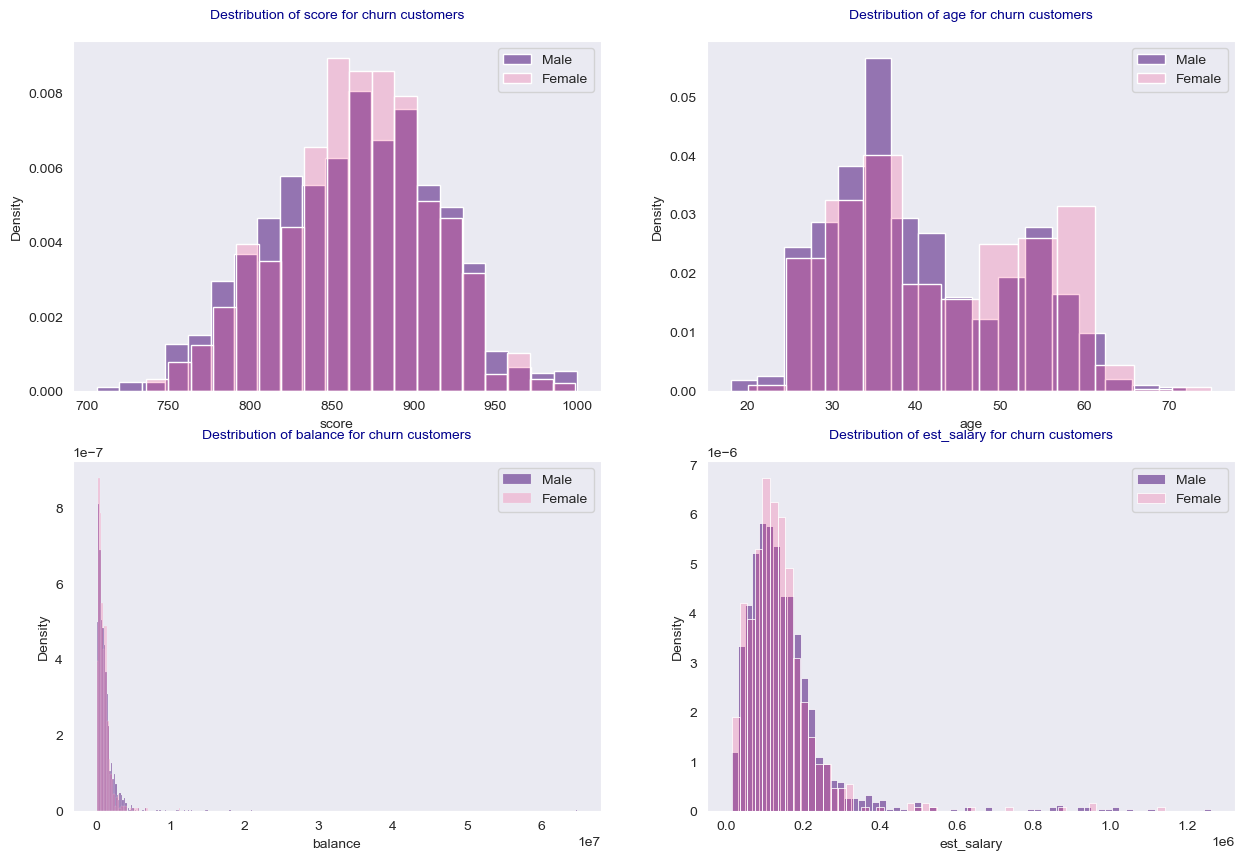

In [104]:
plt.figure(figsize = (15,10))
for i, col in enumerate(numeric[1:]):
    ax = plt.subplot(2, 2, i+1)
    sns.histplot(data = data_churn[data_churn['gender'] == 'М'][col], ax = ax, color =  '#3F0071', alpha = 0.5, stat = 'density', common_norm =False)
    sns.histplot(data = data_churn[data_churn['gender'] == 'Ж'][col], ax = ax, color = '#FB2576', alpha = 0.2, stat = 'density', common_norm =False)
    ax.set_title('Destribution of {} for churn customers'.format(col) + "\n", fontsize = 10, color = 'DarkBlue')
    plt.legend(['Мale', 'Female'])

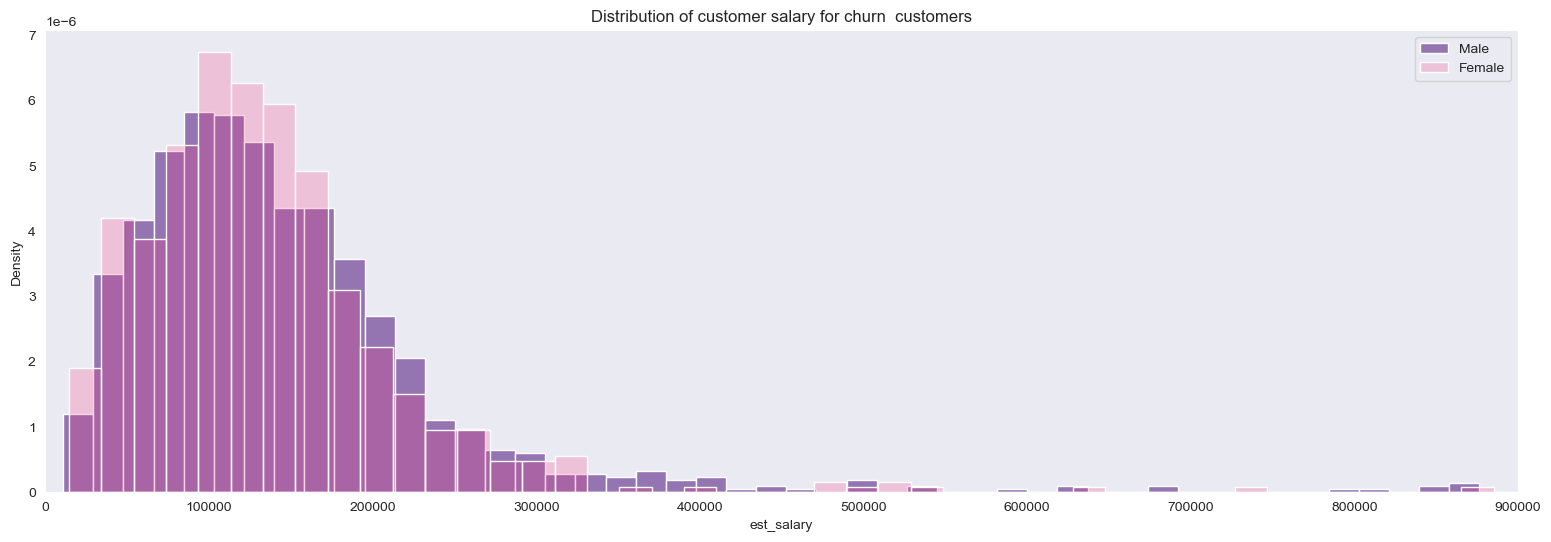

In [105]:
plt.figure(figsize=(19,6))
sns.histplot(data = data_churn[data_churn['gender'] == 'М']['est_salary'], color =  '#3F0071', alpha = 0.5, stat = 'density', common_norm =False)
sns.histplot(data = data_churn[data_churn['gender'] == 'Ж']['est_salary'],  color = '#FB2576', alpha = 0.2, stat = 'density', common_norm =False)
plt.xlim(0,0.9e+06)
plt.legend(['Мale', 'Female'])
plt.title('Distribution of customer salary for churn  customers')
plt.show()

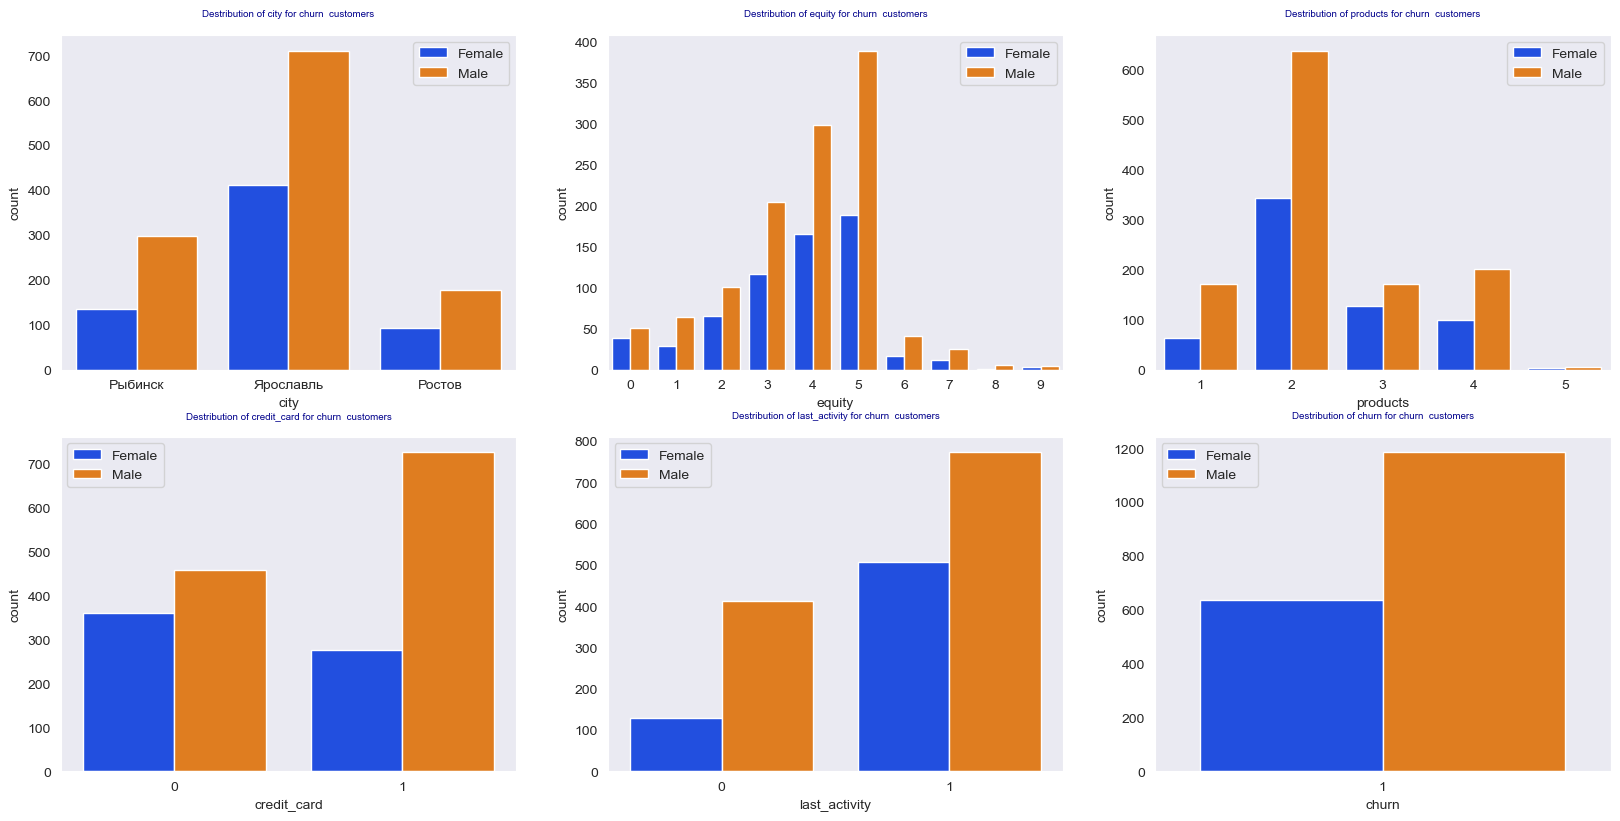

In [106]:
plt.figure(figsize = (20,20))
for i, col in enumerate(categorial[2:]):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(data = data_churn, x = col, hue = 'gender', dodge = True, palette='bright')
    ax.set_title('Destribution of {} for churn  customers'.format(col) + "\n", fontsize = 7, color = 'DarkBlue')
    plt.legend(['Female','Мale' ])

*Let's add a separation column by age, take three categories up to 30, 30-60, 60+*

In [107]:
def categorize_age(age):
    try:
        if 0 <= age <= 29:
            return 'before 30'
        elif 30 <= age <= 40:
            return '30-50'
        elif 41 <= age <= 49:
            return '40-50'
        elif 50 <= age <= 60:
            return '50-60'
        elif age >= 61:
            return '60+'
    except:
        pass

In [108]:
data['age_category'] = data['age'].apply(categorize_age)
data.head()

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  yaroslavl  \
0            0              1    75719.14      1            1          0   
1            1              0    86621.77      0            1          0   
2            1              1   107683.34      0            1          0   
3            0              1   174423.53      1            1          1   
4            1              0    67353.16      1            0          1   

   ribinsk  rostov age_category  
0        1       0    before 30  
1        1       0        30-50  
2        1       0        30-50  
3        0       0        50-60  
4        0       0        30-50

In [109]:
get_churn(data, 'age_category')

*We see that the largest churn is in the 50-60 segment, and the smallest is in the 60+ segment, as well as a high one in up to 30, which has not been seen in the study before, let's try to break it down into genders* 

In [110]:
def get_churn_2(df, col1, col2):
    display(pd.DataFrame(df.groupby([col1, col2])['churn'].agg(['mean', 'count']).reset_index()).rename(columns={'mean':'churn rate'}).style.background_gradient('coolwarm').format("{:.1%}",subset='churn rate'))



In [111]:
get_churn_2(data, 'age_category','gender')

*As we can see from the table, indeed, the most leaking segment by age and gender is Men 50-60, in general, the portraits compiled above confirm that women 60+ (only 3% outflow), 40-50 (8.8%), and 30 -40 (13.7%), we pay attention to the sample, the category under 30 is small, the smallest group is men 60+ and the percentage of outflow here is lower than in the whole gender group.*

*Add a column for the number of products greater than 2*

In [112]:
data['are_products_2+'] = data['products'] > 2
data.head()

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  yaroslavl  \
0            0              1    75719.14      1            1          0   
1            1              0    86621.77      0            1          0   
2            1              1   107683.34      0            1          0   
3            0              1   174423.53      1            1          1   
4            1              0    67353.16      1            0          1   

   ribinsk  rostov age_category  are_products_2+  
0        1       0    before 30            False  
1        1       0        30-50             True  
2        1       0        30-50            False  
3        0       0        50-60            False  
4        0       0        30-50            False

In [113]:
get_churn(data, 'are_products_2+')

In [114]:
get_churn_2(data, 'gender','are_products_2+')

*Also confirming the trend, the more products, the lower the retention*

*Now we will  consider the income and try to more accurately determine the categories according to the graphs*

In [115]:
def categorize_income(income):
    try:
        if 0 <= income <= 99990:
            return '100к'
        elif 99991 <= income <= 180000:
            return '100к-180к'
        elif income >= 180001:
            return '180+'
    except:
        pass

In [116]:
data['salary_category'] = data['est_salary'].apply(categorize_income)
data.head()

userid  score       city gender  age  equity     balance  products  \
0  183012    850    Рыбинск      Ж   25       1    59214.82         2   
1  146556    861    Рыбинск      Ж   37       5   850594.33         3   
2  120722    892    Рыбинск      Ж   30       0         NaN         1   
3  225363    866  Ярославль      Ж   51       5  1524746.26         2   
4  157978    730  Ярославль      М   34       5      174.00         1   

   credit_card  last_activity  est_salary  churn  gender_code  yaroslavl  \
0            0              1    75719.14      1            1          0   
1            1              0    86621.77      0            1          0   
2            1              1   107683.34      0            1          0   
3            0              1   174423.53      1            1          1   
4            1              0    67353.16      1            0          1   

   ribinsk  rostov age_category  are_products_2+ salary_category  
0        1       0    before 30            False            100к  
1        1       0        30-50             True            100к  
2        1       0        30-50            False       100к-180к  
3        0       0        50-60            False       100к-180к  
4        0       0        30-50            False            100к

In [117]:
get_churn(data, 'salary_category')

In [118]:
get_churn_2(data, 'gender','salary_category')

*The largest outflow is observed in the segment of men with an income of 100,000 - 180,000 rubles - up to a quarter of clients, the smallest outflow for women with an income of less than 100,000 rubles - 10.1%*

### Drawing up a portrait

*Based on the above data, the results of the exploratory analysis, segmentation and charts in the context of the outflow, we will draw up portraits of retained and outflowing customers*

*Retained Client**

1. Woman
2. up to 40-50 years old and over 60 years old
3. From Yaroslavl or Rybinsk
4. Low property rating (0-1)
5. With a credit score below 800
6. With an income below 100,000
7. With an account balance of 600-800 thousand rubles
8. With 1-2 products
9. With a credit card
10. Inactive recently

**Leaking client**

1. Man
2. 30-60 years old
3. From Yaroslavl or Rostov
4. With a property rating above 5
5. With a credit score above 800
6. With an income of more than 100,000 - 180,000 rubles
7. With more than 2 products
8. No credit card
9. Active recently

<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
     <br/> We have identified the segments for which it is necessary to conduct an advertising campaign to retain users: This is a woman under the age of 40-50 or over 60 years old, from Yaroslavl or Rybinsk, with an income below 100,000 and using 1-2 bank products.

## General conclusions
<a id="conclusion"></a>

<div style="border:solid pink 2px; padding: 20px">
 <br/> 1. A study of the bank's clients was made in order to highlight the portraits of flowing and retained clients. A data frame with 10,000 records was examined.
<br/> 2. As a result of the study, it turned out that customers with a low customer rating (less than 800), as well as older customers (over 70 years old), stay with the bank. However, there is a possibility that older clients do not announce their retirement from the bank due to passing away.
<br/>3. For clients of middle age (30-40 years) and older (50-60 years) 26% leave the bank more often than others, however, the older the client, the more likely it is to retain.
<br/>4. In absolute terms, Yaroslavl has the largest number of churning clients, however, and the sample is large there. While in a relative sense. The same share of customers in Rostov is leaking - 19%.
 <br/>5. By gender, despite the fact that there are more women clients in the sample, most clients are men, both in relative and absolute units. The share of male clients who leave is 23%.
<br/>6. The following trend is noteworthy: the higher the rating of the property, the greater part of the clients flow away. Up to 30% for a property rating of 5. For a rating above 5, the samples are small for conclusions. At the same time, the correlation of leakage with this characteristic showed a moderate relationship.
 <br/>7. Also, a negative trend is observed among customers who use numerous bank products, and along with the distribution of active and inactive customers, it turns out that customers who have received some additional product recently are flowing away, this is confirmed by the correlation matrix. With 3 products, 30% of the departed are observed. At the same time, the sample for a larger number of products used is insignificant for any conclusions.
 <br/>8. It can be seen that customers who use credit cards stay with the bank more often than customers without them (14.7% vs. 25.6%).
<br/>9. Retained Client Profile: Female, 40-50 or over 60, from Yaroslavl or Rybinsk, using 1-2 bank products, including a credit card, with an income below 100,000.
<br/>10. Leaking client: Male, 30-60 years old, from Yaroslavl or Rostov, using numerous bank products (2+), with an income of 100,000 - 180,000 rubles, rather does not have a credit card, and has been active recently.

## Recommendations
<a id="recomend"></a>

<div style="border:solid pink 2px; padding: 20px">
 <br/> 1. Conduct additional research:
     <br/> - get data on the dates of the introduction of new products and the flow of customers who received these products, see the dependence.
     <br/> - to retain customers, 70+, in connection with their passing away.
  <br/> 2. Among Men aged 30-60 years, conduct an advertising campaign with additional discounts on additional products, or additional preferential conditions for using a credit card, with additional conditions for discounts from bank partners.
  <br/> 3. Conduct a similar promotion for people with income above 100,000 in Yaroslavl and Rostov.

##  Presentation
 <a id="present"></a>

Presentatition: <https://drive.google.com/file/d/137BJksSXSX7XcVtEUscqCSCLBDi8dQxs/view?usp=share_link> 

## Dashboards
<a id="dash"></a>

Dashboard 1: `The salary of bank costumers`
<https://public.tableau.com/app/profile/fedor.ivannikov/viz/Bank_metanprom/Bank_by_salary?publish=yes>

Dashboard 2: `Destribution of costumers by number of bank products with geograpy filter`
<https://public.tableau.com/app/profile/fedor.ivannikov/viz/Bank_metanprom_2/By_products?publish=yes>